[](http://)

#                                     **PREDICTION OF DEPRESSION, ANXIETY AND STRESS**

  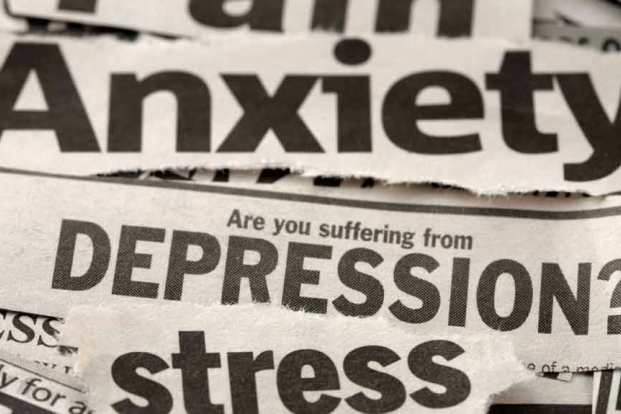

In [124]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/depression-anxiety-stress-scales/DASS_data_21.02.19/demo1.png
/kaggle/input/depression-anxiety-stress-scales/DASS_data_21.02.19/codebook.txt
/kaggle/input/depression-anxiety-stress-scales/DASS_data_21.02.19/data.csv


In [2]:
data=pd.read_csv('/kaggle/input/depression-anxiety-stress-scales/DASS_data_21.02.19/data.csv',delimiter='\t')
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


**Removing columns stating the time or position where the questions were answered**

**Also Removing columns**

Introelapse->The time spent on the introduction/landing page

Testelapse->The time spent on all the DASS questions 

Surveyelapse->The time spent answering the rest of the demographic and survey questions



**The Ten Item Personality Inventory was administered**.

**The TIPI items were rated "I see myself as:" _____ such that**

* 1 = Disagree strongly
* 2 = Disagree moderately
* 3 = Disagree a little
* 4 = Neither agree nor disagree
* 5 = Agree a little
* 6 = Agree moderately
* 7 = Agree strongly 

In [3]:
data_1=data.copy()
data_1['major']=data_1['major'].replace(np.nan,'No Degree')
time = [i for i in data_1.iloc[:,0:126] if  'E' in i]
position = [i for i in data_1.iloc[:,0:126] if  'I' in i]
data_1=data_1.drop(position,axis=1)
data_1=data_1.drop(time,axis=1)
data_1=data_1.drop(data_1.iloc[:,43:47],axis=1)
data_2=data_1.copy()
data_2=data_2.drop(data_2.iloc[:,53:69],axis=1)
data_2=data_2.replace(to_replace=0,value=3)
data_2=data_2.rename(columns={'TIPI1':'Extraverted-enthusiastic','TIPI2':'Critical-quarrelsome',
                            'TIPI3':'Dependable-self_disciplined','TIPI4':'Anxious-easily upset',
                            'TIPI5':'Open to new experiences-complex','TIPI6':'Reserved-quiet',
                            'TIPI7':'Sympathetic-warm','TIPI8':'Disorganized-careless','TIPI9':'Calm-emotionally_stable',
                            'TIPI10':'Conventional-uncreative'})
print('Shape',data_2.shape)
print('Attributes',data_2.columns)

Shape (39775, 68)
Attributes Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'country',
       'Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
       'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
       'Disorganized-careless', 'Calm-emotionally_stable',
       'Conventional-uncreative', 'education', 'urban', 'gender', 'engnat',
       'age', 'screensize', 'uniquenetworklocation', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize', 'major'],
      dtype='object')


In [4]:
data_1.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,4,2,4,4,4,4,4,2,1,...,1,1,1,12,1,10,2,1,2,No Degree
1,4,1,2,3,4,4,3,4,3,2,...,2,1,2,7,0,70,2,1,4,No Degree
2,3,1,4,1,4,3,1,3,2,4,...,2,1,1,4,3,60,1,1,3,No Degree
3,2,3,2,1,3,3,4,2,3,3,...,2,1,2,4,5,70,2,1,5,biology
4,2,2,3,4,4,2,4,4,4,3,...,2,2,3,10,1,10,2,1,4,Psychology


**Cleaning different Majors by People Participated in the Survey**

*People with No Degree or given no answers or type of &#1593 are accumulated under the name *No Degree**

In [5]:
def condition(title):
    if 'busin' in str(title).lower() or 'manage' in str(title).lower() or 'Buss' in str(title) or 'Bisness' in str(title) or 'Manag' in str(title) or 'buis' in str(title) or 'Entrepreneur' in str(title) or 'entrepr' in str(title).lower() or 'managment' in str(title).lower() or 'Buis' in str(title) or 'Busni' in str(title) or 'Mana' in str(title) or 'buss' in str(title).lower() or 'Bi' in str(title) or 'Mgt' in str(title) or 'MBA' in str(title) or 'Mgmt' in str(title) or 'MD' in str(title):
        return 'Business/Management'
    elif 'information technology' in str(title).lower() or 'IT' in str(title) or 'it' in str(title):
        return 'I.T'
    elif 'math' in str(title).lower() or 'LOGISTICS' in str(title) or 'st' in str(title).lower() or 'marh' in str(title).lower() or 'Mate' in str(title):
        return 'Mathematics'
    elif 'computer' in str(title).lower():
        return 'I.T'
    elif 'bio' in str(title).lower() or 'Plant' in str(title) or 'plant' in str(title).lower() or 'Micro' in str(title):
        return 'Biology'
    elif 'tesl' in str(title).lower() or 'TES' in str(title) or 'Teso' in str(title) or 'Enhlish' in str(title):
        return 'English'
    elif 'account' in str(title).lower() or 'Accoun' in str(title) or 'Acc' in str(title) or 'acc' in str(title).lower() or 'Acouunt' in str(title) or 'Acvount' in str(title) or 'Count' in str(title):
        return 'Accountacy'
    elif 'CA' in str(title):
        return 'CA'
    elif 'none' in str(title).lower() or '0' in str(title) or  '_' in str(title) or '.' in str(title) or 'Nine' in str(title) or '19' in str(title):
        return 'No Degree'
    elif 'nurs' in str(title).lower() or 'BSN' in str(title):
        return 'Nursing'
    elif '-' in str(title).lower() or 'NIL' in str(title):
        return 'No Degree'
    elif 'teach' in str(title).lower() or 'Lect' in str(title) or 'eet' in str(title).lower():
        return 'Teaching'
    elif 'pharma' in str(title).lower() or 'medic' in str(title).lower() or 'med' in str(title).lower() or 'hospi' in str(title).lower() or 'Mwdicine' in str(title) or 'Farmacy' in str(title) or 'Pharacology' in str(title) or 'farmasi' in str(title).lower() or 'Farmasy' in str(title):
        return 'Pharmacy/Medical'
    elif 'doctor' in str(title).lower() or  'MBBS' in str(title) or 'Mbbs' in str(title) or 'Surge' in str(title) or 'surge' in str(title) or 'mbbs' in str(title).lower()or 'dermat' in str(title).lower() or 'Podiat' in str(title) :
        return 'Doctor'
    elif 'no' in str(title).lower() or 'Undec' in str(title) or 'Idk' in str(title) or 'idk' in str(title).lower() or 'Hahaha' in str(title) or 'never' in str(title).lower() or 'T' in str(title) or 'Good' in str(title):
        return 'No Degree'
    elif 'film' in str(title).lower() or 'Cinema' in str(title) or 'fil' in str(title).lower() or 'Adver' in str(title) or 'adver' in str(title) or 'Act' in str(title) or 'Enter' in str(title) or 'digital' in str(title).lower() or 'cinema' in str(title).lower() or 'Video' in str(title) or 'Direct' in str(title) or 'Theat' in str(title) or 'Radio' in str(title) or 'theat' in str(title).lower() or 'drama' in str(title).lower():
        return 'Media'
    elif 'international' in str(title).lower() or 'Internatianal' in str(title):
        return 'International Relations'
    elif 'human' in str(title).lower() or 'hr' in str(title).lower() or 'Hs' in str(title) or 'Hm' in str(title) or 'Humam' in str(title):
        return 'Human Resources'
    elif 'art' in str(title).lower() or 'Painting' in str(title) or 'Drawing' in str(title) or 'ba' in str(title) or 'Printing' in str(title) or 'las' in str(title).lower() or 'Ma' in str(title) or 'paint' in str(title).lower() or 'creative' in str(title).lower() or 'AA' in str(title) or 'BA' in str(title):
        return 'Arts'
    elif 'islam' in str(title).lower() or 'Muamalat' in str(title) or 'Quran' in str(title) or 'Halal' in str(title) or 'Usul' in str(title) or 'Zakat' in str(title) or 'usul' in str(title).lower():
        return 'Islamic Studies'
    elif 'physio' in str(title).lower() or 'fis' in str(title).lower():
        return 'Physiotherapy'
    elif 'socio' in str(title).lower() or 'social' in str(title).lower() or 'soical' in str(title).lower() or 'Sis' in str(title) or 'Sosio' in str(title) or 'Sicio' in str(title) or 'sosiality' in str(title).lower():
        return 'Sociology'
    elif 'bank' in str(title).lower():
        return 'Banking'
    elif 'agri' in str(title).lower():
        return 'Agriculture'
    elif 'Market' in str(title) or 'Finan' in str(title) or 'finance' in str(title).lower() or 'MARKETING' in str(title) or 'market' in str(title).lower() or 'retail' in str(title).lower() or 'CMP' in str(title) or 'Merket' in str(title):
        return 'Marketing/Finance'
    elif 'counsel' in str(title).lower() or 'cauns' in str(title) or 'Kaunseling' in str(title) or 'kaunseling' in str(title) or 'Caunsel' in str(title):
        return 'Counselling'
    elif 'programming' in str(title).lower() or 'coding' in str(title).lower() or 'Ibm' in str(title) or 'ceit' in str(title) or 'Hacking' in str(title):
        return 'I.T'
    elif 'civil' in str(title).lower() or 'comp' in str(title).lower() or 'Mechanical' in str(title) or 'Electrical' in str(title) or 'Mechatronics' in str(title) or 'Eee' in str(title) or 'cs' in str(title).lower() or 'mecha' in str(title) or 'Chemical' in str(title) or 'chemical' in str(title) or 'tech' in str(title) or 'ec' in str(title).lower() or 'egineering' in str(title).lower() or 'manufacturing' in str(title).lower():
        return 'Engineering'
    elif 'ict' in str(title).lower() or 'developer' in str(title).lower() or 'I.T' in str(title) or 'CAE&D' in str(title) or 'It' in str(title):
        return 'I.T'
    elif 'commu' in str(title).lower() or 'comm' in str(title).lower() or 'com' in str(title).lower() or 'Conmunication' in str(title):
        return 'Communications'
    elif 'administration' in str(title).lower() or 'admin' in str(title).lower():
        return 'Administration'
    elif 'psycho' in str(title).lower() or 'psy' in str(title).lower() or 'Clinical osychology' in str(title) or 'hschology' in str(title) or 'Pysch' in str(title) or 'pys' in str(title).lower() or 'Pych' in str(title) or 'pscy' in str(title) or 'payc' in str(title).lower() or 'Phyc' in str(title) or 'psicologia' in str(title) or 'Phsychology' in str(title) or 'Phichology' in str(title) or 'psuchology' in str(title) or 'Pschology' in str(title) or 'psikologi' in str(title).lower():
        return 'Psychology'
    elif 'english' in str(title).lower() or 'Elglish' in str(title) or 'esl' in str(title).lower() or 'Emg' in str(title) or 'emglisj' in str(title).lower():
        return 'English'
    elif 'law' in str(title).lower() or 'BBA' in str(title) or 'llb' in str(title) or 'lew' in str(title).lower() or 'kaw' in str(title).lower() or 'enforcement' in str(title).lower() or 'Kaw' in str(title):
        return 'Law'
    elif 'engineering' in str(title).lower() or 'engi' in str(title).lower() or 'eng' in str(title).lower() or 'Software' in str(title) or 'soft' in str(title).lower() or 'mechanical' in str(title).lower() or 'Egineeering' in  str(title) or 'electronic' in str(title).lower() or 'CE' in str(title) or 'mech' in str(title).lower() or 'Ciclvil' in str(title) or 'Eggineering' in str(title) or 'Tech' in str(title) or 'Teol' in str(title) or 'EEE' in str(title) or 'PE' in str(title):
        return 'Engineering'
    elif 'architecture' in str(title).lower() or 'aechitecture' in str(title).lower() or 'archirecture' in str(title).lower() or 'architect' in str(title).lower() or 'Arsitechture' in str(title) or 'Building' in str(title) or 'building' in str(title).lower() or 'Arc' in str(title):
        return 'Architecture'
    elif 'design' in str(title).lower() or 'Desig' in str(title) or 'Dssign' in str(title):
        return 'Designer'
    elif 'science' in str(title).lower() or 'Sceince' in str(title) or 'Sci' in str(title) or 'sciene' in str(title) or 'BS' in str(title):
        return 'Pure Sciences'
    elif 'physics' in str(title).lower() or 'Phsyics' in str(title) or 'EMC' in str(title) or 'Physic' in str(title) or 'physi' in str(title):
        return 'Physics'
    elif 'chemistry' in str(title).lower() or 'CIS' in str(title) or 'Chem' in str(title):
        return 'Chemistry'
    elif 'french' in str(title).lower() or 'Fr' in str(title):
        return 'French'
    elif 'religi' in str(title).lower() or 'Relegion' in str(title) or 'Rel' in str(title) or 'Hukum' in str(title) or 'Sains' in str(title):
        return 'Religious Studies'
    elif title=='&#1593;&#1604;&#1605; &#1606;&#1601;&#1587;' or title=='&#22810;&#23186;&#39636;&#35373;&#35336;' or title=='nil' or title=='drop out' or title=='&#1055;&#1089;&#1080;&#1093;&#1086;&#1083;&#1' or title=='75' or title=='Secondary education' or title=='Thiê&#769;t kê&#769; &#273;ô&#768; ho&#803;a' or title=='18' or title=='ongoing' or title=='&#28888;&#22521;' or title=='lol' or title=='In college currently' or title=='secondary education' or title=='Dropped out' or title=='na' or title=='didnt attend' or title=='im going on the next year. ' or title=='&#304;lahiyat' or title=='lmfao, im 15' or title=='Elem Ed' or title=='yes' or title=='N/a' or title=='/' or title=='???' or title=='cocaine 101' or title=='doesnt matter' or title== 'oooo' or title=='G' or title=='Yes' or title=='Na' or title=='Na 'or title=='Want sure':
        return 'No Degree'
    elif 'Music' in str(title) or 'Dance' in str(title) or 'danc' in str(title).lower() or 'Vocational' in str(title) or 'Muisc' in str(title) or 'music' in str(title).lower() or 'Performance' in str(title):
        return 'Music/Dance'
    elif 'pol' in str(title).lower() or 'Govern' in str(title) or 'Right' in str(title):
        return 'Politics'
    elif 'photo' in str(title).lower() or 'Foto' in str(title) or 'Photo' in str(title):
        return 'Photography'
    elif 'Television' in str(title) or 'telev' in str(title).lower():
        return 'Television'
    elif 'bahasa' in str(title).lower() or 'Bahasa' in str(title) or 'Malay' in str(title) or 'malay' in str(title).lower():
        return 'Malaysian languages'
    elif 'Urban' in str(title) or 'Town' in str(title) or 'town' in str(title).lower() or 'planning' in str(title) or 'Plann' in str(title) or 'development' in str(title):
        return 'Economic Developments'
    elif 'Public' in str(title) or 'public' in str(title).lower():
        return 'Public Relations'
    elif 'Writing' in str(title) or 'writing' in str(title).lower() or 'Screenwritinf' in str(title) or 'Author' in str(title):
        return 'Writing/Author'
    elif 'philosophy' in str(title).lower() or 'Phil' in str(title) or 'philos' in str(title).lower() or 'Filo' in str(title) or 'Phylosophy' in str(title):
        return 'Philosophy'
    elif 'Actua' in str(title):
        return 'Acturial Studies'
    elif 'DENTALWORKS' in str(title) or 'dental' in str(title) or 'Dental' in str(title) or 'Odont' in str(title):
        return 'Dentist'
    elif 'beaut' in str(title).lower() or 'Fashion' in str(title) or 'make' in str(title) or 'fashion' in str(title).lower() or 'hair' in str(title).lower() or 'cosmet' in str(title).lower():
        return 'Fashion'
    elif 'Health' in str(title) or 'health' in str(title).lower() or 'wellness' in str(title).lower() or 'Healtcare' in str(title):
        return 'Healthcare'
    elif 'Language' in str(title) or 'lang' in str(title).lower() or 'Laq' in str(title):
        return 'Languages'
    elif 'cook' in str(title).lower() or 'bakery' in str(title).lower() or 'Bak' in str(title) or 'CULINARY' in str(title) or 'Food' in str(title) or 'food' in str(title) or 'chef' in str(title).lower() or 'Cul' in str(title) or 'Patiss' in str(title) or 'culi' in str(title).lower():
        return 'Cookings'
    elif 'Hotel' in str(title) or 'hotel' in str(title).lower() or 'food service' in str(title) or 'cater' in str(title).lower():
        return 'Hotel Management'
    elif 'therapy' in str(title).lower() or 'ot' in str(title).lower() or 'theraphy' in str(title):
        return 'Therapeutical Studies'
    elif 'veter' in str(title).lower() or 'Veter' in str(title) or 'Vet' in str(title):
        return 'Veterinary'
    elif 'Survey' in str(title) or 'survey' in str(title) or 'serveyors' in str(title).lower() or 'Qs' in str(title) or 'SURVEYING' in str(title) or 'QS' in str(title) or 'Surver' in str(title):
        return 'Surveyour Studies'
    elif 'Aircraft' in str(title) or 'aircraft' in str(title).lower() or 'aircr' in str(title).lower() or 'aviation' in str(title).lower() or 'Aero' in str(title) or 'navigation' in str(title).lower():
        return 'Aircrafts'
    elif 'environment' in str(title).lower() or 'Environment' in str(title) or 'envi' in str(title).lower():
        return 'Environmental Educations'
    elif 'Syariah' in str(title) or 'syariah' in str(title):
        return 'Syrian Languages'
    elif 'judicial' in str(title).lower() or 'juri' in str(title).lower() or 'legal' in str(title).lower():
        return 'Judicial Studies'
    elif 'Liter' in str(title) or 'literature' in str(title) or 'litt' in str(title).lower():
        return 'Literature'
    elif 'child' in str(title).lower() or 'Child' in str(title) or 'Preschool' in str(title):
        return 'Child Educations'
    elif 'Tour' in str(title) or 'tour'  in str(title).lower():
        return 'Tourisms'
    elif 'Gam' in str(title) or 'game' in str(title).lower():
        return 'Gaming'
    elif 'education' in str(title).lower() or 'Education' in str(title) or 'ed' in str(title).lower() or 'acad' in str(title) or 'Dploma' in str(title):
        return 'B.Ed or M.Ed'
    elif 'Sport' in str(title) or 'sport' in str(title).lower():
        return 'Sports'
    elif 'Petro' in str(title):
        return 'Petroleum'
    elif 'Journ' in str(title) or 'jour' in str(title).lower() or 'Joun' in str(title) or 'Jurn' in str(title):
        return 'Journalism'
    elif 'Mandarin' in str(title):
        return 'Chinese/Mandarin Languages'
    elif 'Electrician' in str(title):
        return 'Electrician'
    elif 'Network' in str(title) or 'network' in str(title).lower():
        return 'Networking'
    elif 'geo' in str(title).lower() or 'GEO' in str(title):
        return 'Geography'
    elif 'Librarian' in str(title) or 'lib' in str(title).lower():
        return 'Librarian'
    elif 'Mission' in str(title) or 'mission' in str(title).lower():
        return 'Missionary Studies'
    elif 'Forensic' in str(title) or 'foren' in str(title).lower() or 'Crime' in str(title) or 'crim' in str(title).lower():
        return 'Forensic/Criminal studies'
    elif 'Animation' in str(title) or 'animation' in str(title).lower() or 'imag' in str(title) or 'graphic' in str(title) or 'Graphic' in str(title):
        return 'Animations'
    elif 'aqua' in str(title).lower() or 'Aqu' in str(title):
        return 'Aquaculture'
    elif 'soldier' in str(title).lower() or 'lwa' in str(title).lower() or 'defence' in str(title):
        return 'Army'
    elif 'Kinesi' in str(title) or 'kines' in str(title).lower() or 'hod' in str(title):
        return 'Human Kinetics'
    elif 'Horti' in str(title) or 'horti' in str(title) or 'Landscape' in str(title):
        return 'Horticulture'
    elif 'commerce' in str(title).lower() or 'Coome' in str(title):
        return 'Commerce'
    elif 'Speech' in str(title) or 'speech' in str(title).lower():
        return 'Speech Pathology'
    elif 'SECRET' in str(title) or 'secret' in str(title).lower():
        return 'Secretary'
    elif 'Animals' in str(title) or 'animal' in str(title).lower() or 'Pet' in str(title):
        return 'Animal Care'
    elif 'Organisation' in str(title) or 'organi' in str(title).lower():
        return 'Organizational Behaviour'
    elif 'event' in str(title).lower() or 'Event' in str(title):
        return 'Event Managment'
    elif 'radiology' in str(title).lower() or 'Radiography' in str(title) or 'radiograpghy' in str(title).lower() or 'Radiation' in str(title) or 'radiography' in str(title):
        return 'Radiography'
    elif 'nutrition' in str(title).lower() or 'Nutrition' in str(title):
        return 'Nutritionist'
    elif 'Audit' in str(title) or 'audit' in str(title).lower():
        return 'Auditing'
    elif 'Neuro' in str(title) or 'neuroligy' in str(title).lower():
        return 'Neurology'
    elif 'Anato' in str(title) or 'anat' in str(title).lower():
        return 'Anatomy'
    elif 'trade' in str(title).lower():
        return 'Trading'
    elif 'Interpre' in str(title) or 'translation' in str(title).lower():
        return 'Interpreter'
    elif 'audio' in str(title).lower() or 'Audio' in str(title):
        return 'Audiology'
    elif 'insurance' in str(title).lower() or 'Insurance' in str(title):
        return 'Insurances'
    elif 'archaeology' in str(title).lower() or 'archaeology' in str(title).lower() or 'archeology' in str(title).lower() or 'treasury' in str(title):
        return 'Archeology'
    elif 'SERV'in str(title) or 'service' in str(title).lower():
        return 'Service Training'
    elif 'GERMAN' in str(title) or 'german' in str(title).lower():
        return 'German'
    elif 'KOREAN' in str(title) or 'Korea' in str(title):
        return 'Korean'
    elif 'valuat' in str(title).lower() or 'valuer' in str(title).lower():
        return 'Registered Valuer'
    elif 'skil' in str(title).lower() or 'Skill' in str(title) or 'Professional' in str(title) or 'practical' in str(title).lower():
        return 'Skilled Labour'
    elif 'virology' in str(title):
        return 'Virology'
    elif 'lab' in str(title).lower() or 'Lab' in str(title) or 'MLT' in str(title):
        return 'Laboratory Worker'
    elif 'GENERAL' in str(title) or 'General' in str(title):
        return 'General'
    elif 'Opto' in str(title) or 'opto' in str(title).lower():
        return 'Optometry'
    elif 'Zoo' in str(title) or 'zoo' in str(title).lower():
        return 'Zoology'
    elif 'office' in str(title).lower() or 'Office' in str(title):
        return 'Office Skills'
    elif 'found' in str(title).lower() or 'Found' in str(title):
        return 'Foundation Education'
    elif 'general' in str(title).lower() or 'General' in str(title):
        return 'General Education'
    elif 'real estate' in str(title).lower() or 'property' in str(title).lower():
        return 'Realtor'
    elif 'Meteorology' in str(title) or 'Metrology' in str(title):
        return 'Meterology'
    elif 'operations' in str(title).lower() or 'Operation' in str(title):
        return 'Operational Managment'
    elif 'Merchandising' in str(title) or 'merchand' in str(title).lower():
        return 'Merchandising'
    elif 'Spanish' in str(title):
        return 'Spanish'
    elif 'Nature' in str(title) or 'natur' in str(title).lower():
        return 'Nature Conservation/Resources'
    elif title=='a level ' or title==' ':
        return 'No Degree'
    elif 'Corporate' in str(title) or 'corporate' in str(title).lower():
        return 'Corporate'
    elif 'greek' in str(title).lower() or 'Greek' in str(title):
        return 'Greek'
    elif 'Behaviour' in str(title) or 'Behavior' in str(title) or 'Organizational Behaviour' in str(title):
        return 'Behaviour Analysis'
    elif 'publish' in str(title).lower():
        return 'Publishing'
    elif 'Safety' in str(title) or 'safety' in str(title).lower():
        return 'Safety Training'
    elif 'genetic' in str(title).lower() or 'Genetic' in str(title):
        return 'Genetics'
    elif 'Dietetic' in str(title):
        return 'Dietician'
    elif 'Production' in str(title) or 'manufacturing' in str(title).lower():
        return 'Production And Manufacturing'
    elif 'Welding' in str(title):
        return 'Welding'
    elif 'Geron' in str(title):
        return 'Gerontology'
    elif 'Research' in str(title) or 'Ph D' in str(title):
        return 'Ph.D'
    elif 'arabic' in str(title).lower() or 'Arabic' in str(title):
        return 'Arabic'

    else:
        return title

data_2['major'] = data_2['major'].apply(condition)

In [6]:
lis=[]
for x in data_2['major']:
    lis.append(x)
print(set(lis))

{'Optometry', 'Geography', 'Gis', 'Production And Manufacturing', 'Chargeman', 'Psychology', 'Surveyour Studies', 'hvac', 'General Education', 'Cretive Visual', 'Spanish', 'Politics', 'Merchandising', 'Nature Conservation/Resources', 'Chemistry', 'Dutch', 'Marketing/Finance', 'Missionary Studies', 'Media', 'Photography', 'Safety Training', 'Therapeutical Studies', 'Mining ', 'Event Managment', 'Publishing', 'Human Kinetics', 'Malaysian languages', 'Kiin', 'B.Ed or M.Ed', 'Fashion', 'Office Skills', 'Army', 'Sociology', 'Forensic/Criminal studies', 'Journalism', 'Registered Valuer', 'I.T', 'Crisis intervention', 'Russian philology', 'maintenance', 'Leadership', 'Networking', 'Veterinary', 'Realtor', 'Judicial Studies', 'Architecture', 'Laboratory Worker', 'Child Educations', 'Cookings', 'Dentist', 'Danish', 'Archeology', 'Palaeontology', 'Behaviour Analysis', 'Horticulture', 'Librarian', 'Nursing', 'No Degree', 'Religious Studies', 'Commerce', 'Pathology', 'Singer', 'German', 'Human Res

In [7]:
data_2=data_2.replace([np.inf, -np.inf], np.nan)
data_2=data_2.dropna()

Text(0.5, 1.0, 'Top 20 Majors of people participated in the Survey')

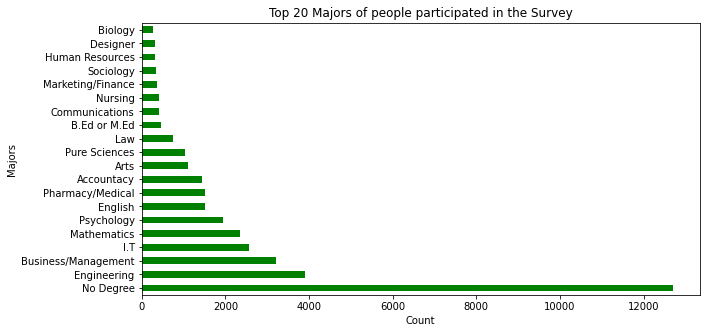

In [8]:
plt.figure(figsize=(10,5))
data_2['major'].value_counts()[:20].plot(kind='barh',color='green')
plt.ylabel('Majors')
plt.xlabel('Count')
plt.title('Top 20 Majors of people participated in the Survey')

Text(0.5, 1.0, 'Top 20 Countries from where people participated in the Survey')

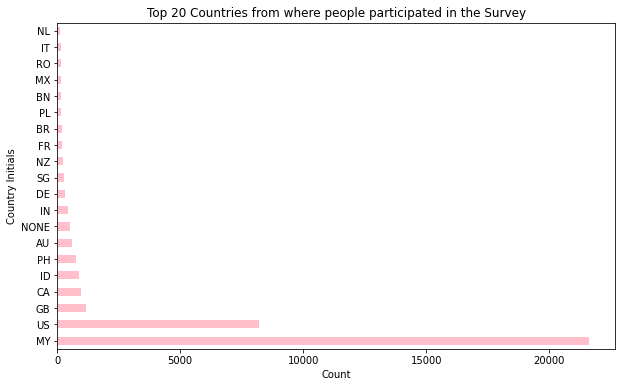

In [9]:
plt.figure(figsize=(10,6))
data_2['country'].value_counts()[:20].plot(kind='barh',color='pink')
plt.ylabel('Country Initials')
plt.xlabel('Count')
plt.title('Top 20 Countries from where people participated in the Survey')

In [10]:
def condition(x):
    if x<=10:
        return 'Under 10'
    if  10<=x<=16:
        return ' Primary Children'
    if 17<=x<=21:
        return 'Secondary Children'
    if 21<=x<=35:
        return 'Adults'
    if 36<=x<=48:
        return 'Elder Adults'
    if x>=49:
        return 'Older People'

data_2['Age_Groups']=data_2['age'].apply(condition)
data_2.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups
0,4,4,2,4,4,4,4,4,2,1,...,1,1,12,1,10,2,1,2,No Degree,Primary Children
1,4,1,2,3,4,4,3,4,3,2,...,1,2,7,3,70,2,1,4,No Degree,Primary Children
2,3,1,4,1,4,3,1,3,2,4,...,1,1,4,3,60,1,1,3,No Degree,Secondary Children
3,2,3,2,1,3,3,4,2,3,3,...,1,2,4,5,70,2,1,5,Biology,Primary Children
4,2,2,3,4,4,2,4,4,4,3,...,2,3,10,1,10,2,1,4,Psychology,Secondary Children


In [11]:
new_data=data_2.iloc[:,42:]
data_3=data_2.filter(regex='Q\d{1,2}A')
data_3.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A
0,4,4,2,4,4,4,4,4,2,1,...,2,3,4,4,1,2,4,3,4,4
1,4,1,2,3,4,4,3,4,3,2,...,3,2,2,3,4,2,2,1,2,2
2,3,1,4,1,4,3,1,3,2,4,...,1,4,3,4,4,4,2,2,1,4
3,2,3,2,1,3,3,4,2,3,3,...,2,4,1,1,2,1,3,4,4,2
4,2,2,3,4,4,2,4,4,4,3,...,4,4,3,4,3,3,3,4,4,3


In [12]:
def sub(data_3):
    return data_3.subtract(1,axis=1)
data_3=sub(data_3) 
DASS_keys = {'Depression': [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42],
             'Anxiety': [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41],
             'Stress': [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]}
Dep = []
for i in DASS_keys["Depression"]:
    Dep.append('Q'+str(i)+'A')
Stress = []
for i in DASS_keys["Stress"]:
    Stress.append('Q'+str(i)+'A')
Anx = []
for i in DASS_keys["Anxiety"]:
    Anx.append('Q'+str(i)+'A')
depression= data_3.filter(Dep)
stress = data_3.filter(Stress)
anxiety = data_3.filter(Anx)


**Scoring as per given answers for the respective set of Depression,Anxiety,Stress questions**

In [13]:
def scores(source):
    col=list(source)
    source['Total_Count']=source[col].sum(axis=1)
    return source
depression=scores(depression)
stress=scores(stress)
anxiety=scores(anxiety)

**After scoring is done combining these three sets back with the the rest of the table**

**Therefore now have 3 dataframes to work with as of Depression,Anxiety,Stress**

 # Depression Set

In [14]:
depression.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Total_Count
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,27
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,24
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,39
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,16
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,32


In [15]:
Depression=pd.merge(depression,new_data,how='left',left_index=True,right_index=True)
Depression.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups
0,1,3,0,3,3,2,0,3,3,3,...,1,1,12,1,10,2,1,2,No Degree,Primary Children
1,1,3,1,3,2,3,1,1,2,1,...,1,2,7,3,70,2,1,4,No Degree,Primary Children
2,3,3,3,3,3,3,3,3,0,3,...,1,1,4,3,60,1,1,3,No Degree,Secondary Children
3,1,2,2,0,1,2,0,0,1,2,...,1,2,4,5,70,2,1,5,Biology,Primary Children
4,2,3,2,3,2,3,2,1,3,2,...,2,3,10,1,10,2,1,4,Psychology,Secondary Children


In [16]:
def condition(x):
    if x<=9:
        return 'Normal'
    if  10<=x<=13:
        return 'Mild'
    if 14<=x<=20:
        return 'Moderate'
    if 21<=x<=27:
        return 'Severe'
    if x>28:
        return 'Extremely Severe'

Depression['Condition']=Depression['Total_Count'].apply(condition)
Depression.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups,Condition
0,1,3,0,3,3,2,0,3,3,3,...,1,12,1,10,2,1,2,No Degree,Primary Children,Severe
1,1,3,1,3,2,3,1,1,2,1,...,2,7,3,70,2,1,4,No Degree,Primary Children,Severe
2,3,3,3,3,3,3,3,3,0,3,...,1,4,3,60,1,1,3,No Degree,Secondary Children,Extremely Severe
3,1,2,2,0,1,2,0,0,1,2,...,2,4,5,70,2,1,5,Biology,Primary Children,Moderate
4,2,3,2,3,2,3,2,1,3,2,...,3,10,1,10,2,1,4,Psychology,Secondary Children,Extremely Severe


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'People Condition of Depression Level')

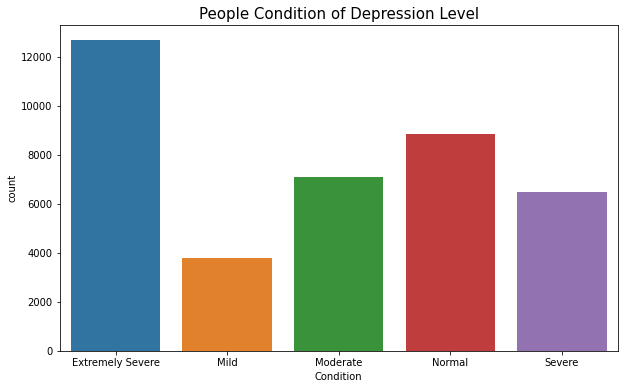

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(Depression.sort_values('Condition').Condition)
plt.title('People Condition of Depression Level',fontsize=15)

**Changing variables for Correlation**

In [18]:
Depr=Depression.copy()
def condition(x):
    if x<=9:
        return 0
    if  10<=x<=13:
        return 1
    if 14<=x<=20:
        return 2
    if 21<=x<=27:
        return 3
    if x>28:
        return 4

def cond(x):
    if x<=10:
        return 0
    if  10<=x<=16:
        return 1
    if 17<=x<=21:
        return 2
    if 21<=x<=35:
        return 3
    if 36<=x<=48:
        return 4
    if x>=49:
        return 5
Depr['Condition']=Depr['Total_Count'].apply(condition)
Depr['Age_Groups']=Depr['age'].apply(cond)
Depr=Depr.drop(columns=['age','Total_Count'])
Depr.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups,Condition
0,1,3,0,3,3,2,0,3,3,3,...,1,12,1,10,2,1,2,No Degree,1,3.0
1,1,3,1,3,2,3,1,1,2,1,...,2,7,3,70,2,1,4,No Degree,1,3.0
2,3,3,3,3,3,3,3,3,0,3,...,1,4,3,60,1,1,3,No Degree,2,4.0
3,1,2,2,0,1,2,0,0,1,2,...,2,4,5,70,2,1,5,Biology,1,2.0
4,2,3,2,3,2,3,2,1,3,2,...,3,10,1,10,2,1,4,Psychology,2,4.0


<AxesSubplot:>

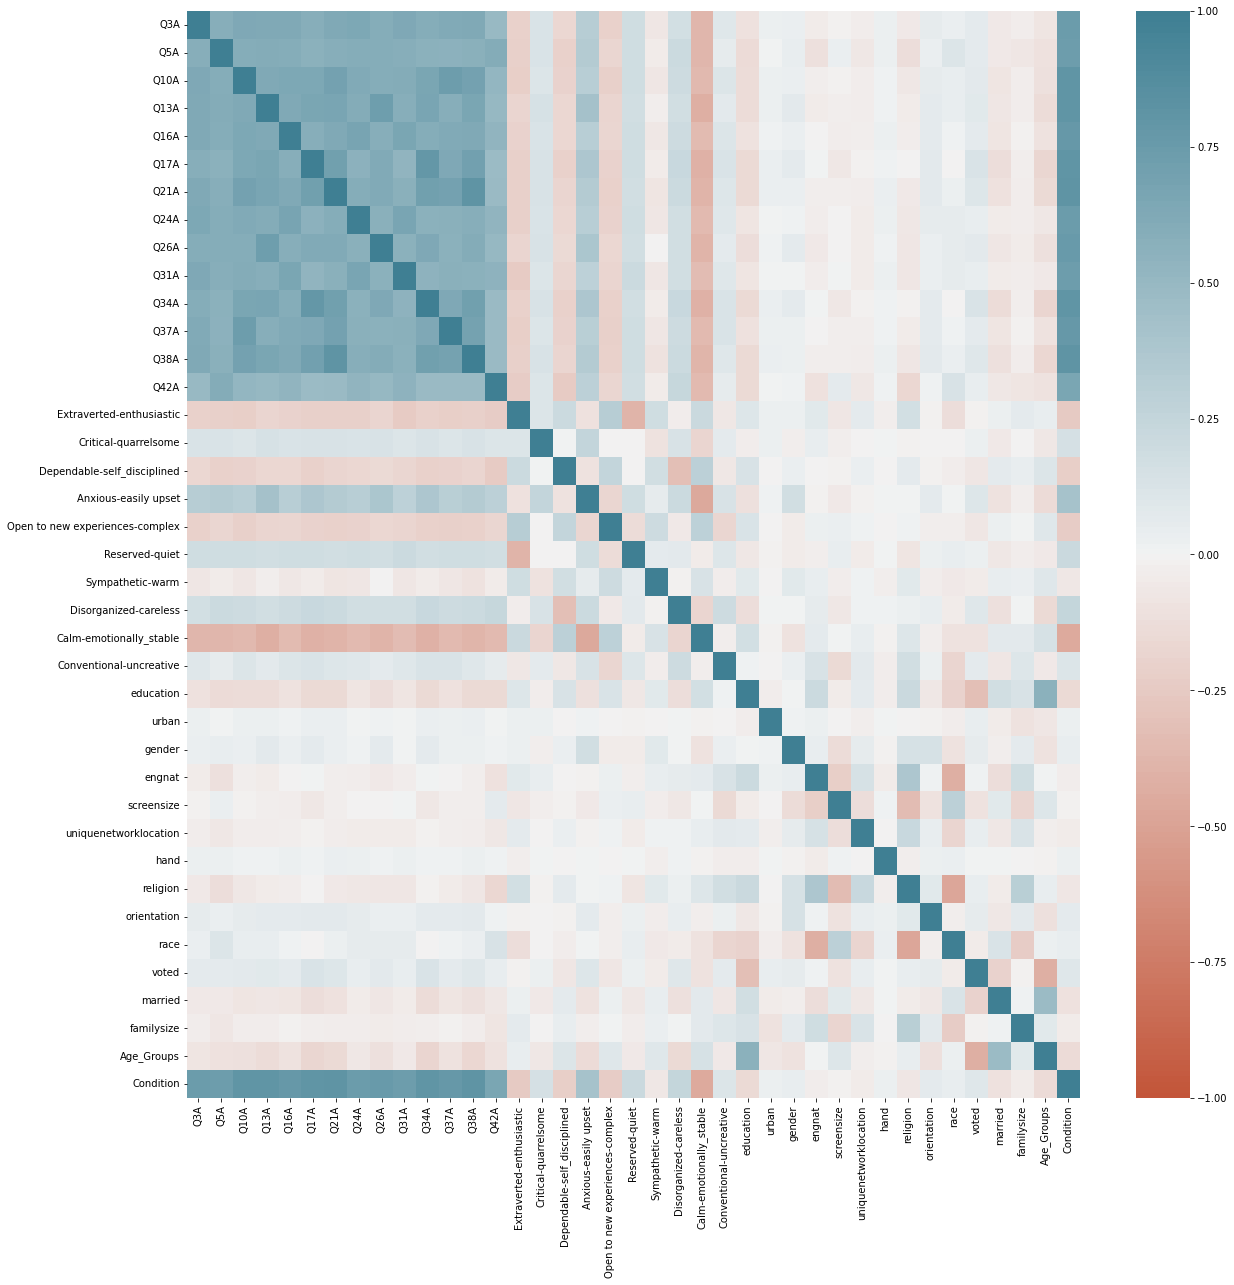

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(Depr.corr(),vmin=-1,vmax=1,cmap=sns.diverging_palette(20,220,n=200))

# Stress Set

In [20]:
stress.head()

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,Total_Count
0,3,3,3,3,3,3,3,3,3,3,3,1,3,3,40
1,3,3,3,1,1,3,1,2,2,2,2,2,1,1,27
2,2,2,2,1,0,0,1,2,1,1,2,0,2,1,17
3,1,2,1,1,0,3,0,0,3,2,0,1,0,2,16
4,1,1,3,1,3,3,3,2,1,1,3,3,2,2,29


In [21]:
Stress=pd.merge(stress,new_data,how='inner',left_index=True,right_index=True)
Stress.head()

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,...,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups
0,3,3,3,3,3,3,3,3,3,3,...,1,1,12,1,10,2,1,2,No Degree,Primary Children
1,3,3,3,1,1,3,1,2,2,2,...,1,2,7,3,70,2,1,4,No Degree,Primary Children
2,2,2,2,1,0,0,1,2,1,1,...,1,1,4,3,60,1,1,3,No Degree,Secondary Children
3,1,2,1,1,0,3,0,0,3,2,...,1,2,4,5,70,2,1,5,Biology,Primary Children
4,1,1,3,1,3,3,3,2,1,1,...,2,3,10,1,10,2,1,4,Psychology,Secondary Children


In [22]:
def condition(x):
    if x<=14:
        return 'Normal'
    if  15<=x<=18:
        return 'Mild'
    if 19<=x<=25:
        return 'Moderate'
    if 26<=x<=33:
        return 'Severe'
    if x>=34:
        return 'Extremely Severe'

Stress['Condition']=Stress['Total_Count'].apply(condition)

Stress.head()

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,...,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups,Condition
0,3,3,3,3,3,3,3,3,3,3,...,1,12,1,10,2,1,2,No Degree,Primary Children,Extremely Severe
1,3,3,3,1,1,3,1,2,2,2,...,2,7,3,70,2,1,4,No Degree,Primary Children,Severe
2,2,2,2,1,0,0,1,2,1,1,...,1,4,3,60,1,1,3,No Degree,Secondary Children,Mild
3,1,2,1,1,0,3,0,0,3,2,...,2,4,5,70,2,1,5,Biology,Primary Children,Mild
4,1,1,3,1,3,3,3,2,1,1,...,3,10,1,10,2,1,4,Psychology,Secondary Children,Severe


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'People Condition for Stress Level')

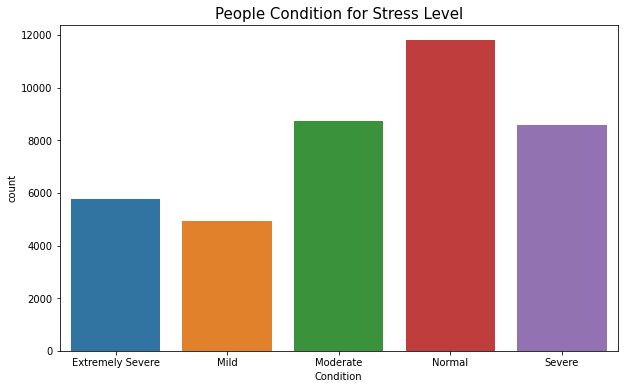

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(Stress.sort_values('Condition').Condition)
plt.title('People Condition for Stress Level',fontsize=15)

**Changing variables for Correlation**

In [24]:
Str=Stress.copy()
def condition(x):
    if x<=9:
        return 0
    if  10<=x<=13:
        return 1
    if 14<=x<=20:
        return 2
    if 21<=x<=27:
        return 3
    if x>28:
        return 4

def cond(x):
    if x<=10:
        return 0
    if  10<=x<=16:
        return 1
    if 17<=x<=21:
        return 2
    if 21<=x<=35:
        return 3
    if 36<=x<=48:
        return 4
    if x>=49:
        return 5
Str['Condition']=Str['Total_Count'].apply(condition)
Str['Age_Groups']=Str['age'].apply(cond)
Str=Str.drop(columns=['age','Total_Count'])
Str.head()

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,...,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups,Condition
0,3,3,3,3,3,3,3,3,3,3,...,1,12,1,10,2,1,2,No Degree,1,4.0
1,3,3,3,1,1,3,1,2,2,2,...,2,7,3,70,2,1,4,No Degree,1,3.0
2,2,2,2,1,0,0,1,2,1,1,...,1,4,3,60,1,1,3,No Degree,2,2.0
3,1,2,1,1,0,3,0,0,3,2,...,2,4,5,70,2,1,5,Biology,1,2.0
4,1,1,3,1,3,3,3,2,1,1,...,3,10,1,10,2,1,4,Psychology,2,4.0


<AxesSubplot:>

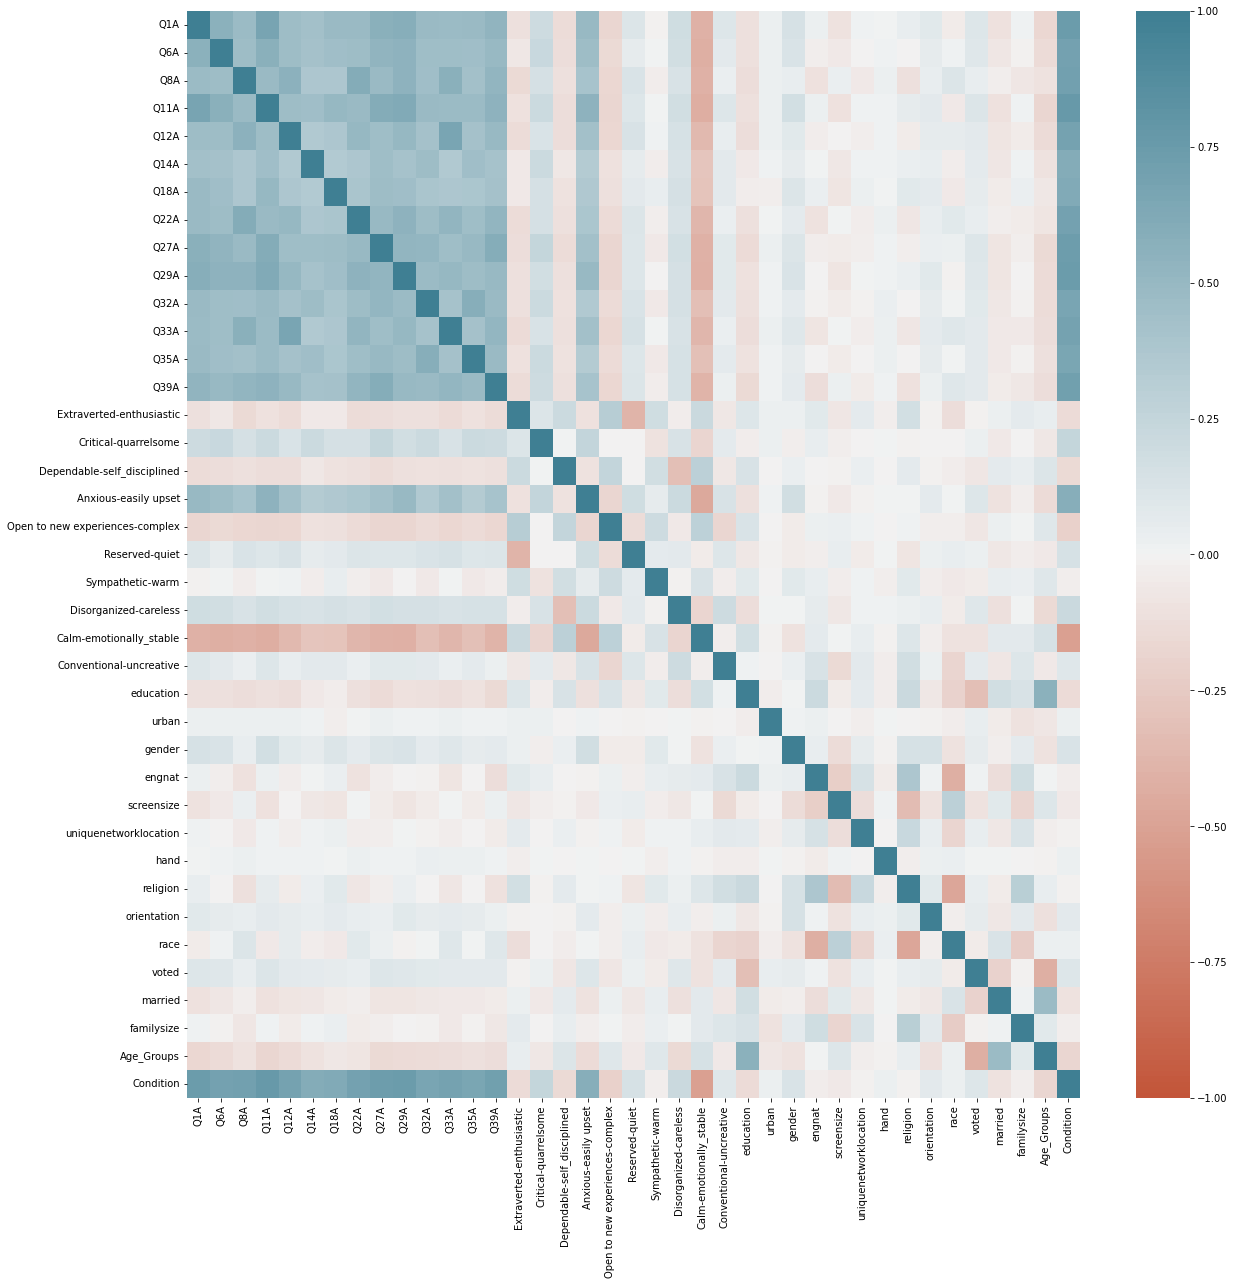

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(Str.corr(),vmin=-1,vmax=1,cmap=sns.diverging_palette(20,220,n=200))

# Anxiety Set

In [26]:
anxiety.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Total_Count
0,3,3,3,1,3,2,2,3,3,2,1,3,2,3,34
1,0,2,2,2,2,0,0,0,1,3,2,2,0,1,17
2,0,0,0,1,3,1,0,1,1,0,1,3,1,0,12
3,2,0,3,2,1,0,1,0,0,0,2,0,3,3,17
4,1,3,3,3,3,3,3,3,3,3,3,3,3,3,40


In [27]:
Anxiety=pd.merge(anxiety,new_data,how='inner',left_index=True,right_index=True)
Anxiety.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups
0,3,3,3,1,3,2,2,3,3,2,...,1,1,12,1,10,2,1,2,No Degree,Primary Children
1,0,2,2,2,2,0,0,0,1,3,...,1,2,7,3,70,2,1,4,No Degree,Primary Children
2,0,0,0,1,3,1,0,1,1,0,...,1,1,4,3,60,1,1,3,No Degree,Secondary Children
3,2,0,3,2,1,0,1,0,0,0,...,1,2,4,5,70,2,1,5,Biology,Primary Children
4,1,3,3,3,3,3,3,3,3,3,...,2,3,10,1,10,2,1,4,Psychology,Secondary Children


In [28]:
def condition(x):
    if x<=7:
        return 'Normal'
    if  8<=x<=9:
        return 'Mild'
    if 10<=x<=14:
        return 'Moderate'
    if 15<=x<=19:
        return 'Severe'
    if x>19:
        return 'Extremely Severe'

Anxiety['Condition']=Anxiety['Total_Count'].apply(condition)
Anxiety.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups,Condition
0,3,3,3,1,3,2,2,3,3,2,...,1,12,1,10,2,1,2,No Degree,Primary Children,Extremely Severe
1,0,2,2,2,2,0,0,0,1,3,...,2,7,3,70,2,1,4,No Degree,Primary Children,Severe
2,0,0,0,1,3,1,0,1,1,0,...,1,4,3,60,1,1,3,No Degree,Secondary Children,Moderate
3,2,0,3,2,1,0,1,0,0,0,...,2,4,5,70,2,1,5,Biology,Primary Children,Severe
4,1,3,3,3,3,3,3,3,3,3,...,3,10,1,10,2,1,4,Psychology,Secondary Children,Extremely Severe


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'People Condition for Anxiety Level')

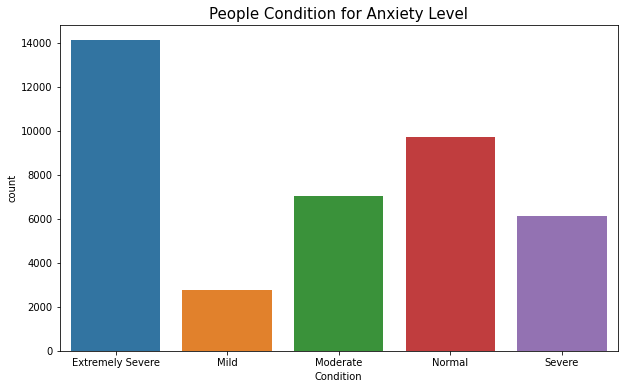

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(Anxiety.sort_values('Condition').Condition)
plt.title('People Condition for Anxiety Level',fontsize=15)

**Changing variables for Correlation**

In [30]:
Anx=Anxiety.copy()
def condition(x):
    if x<=9:
        return 0
    if  10<=x<=13:
        return 1
    if 14<=x<=20:
        return 2
    if 21<=x<=27:
        return 3
    if x>28:
        return 4

def cond(x):
    if x<=10:
        return 0
    if  10<=x<=16:
        return 1
    if 17<=x<=21:
        return 2
    if 21<=x<=35:
        return 3
    if 36<=x<=48:
        return 4
    if x>=49:
        return 5
Anx['Condition']=Anx['Total_Count'].apply(condition)
Anx['Age_Groups']=Anx['age'].apply(cond)
Anx=Anx.drop(columns=['age','Total_Count'])
Anx.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups,Condition
0,3,3,3,1,3,2,2,3,3,2,...,1,12,1,10,2,1,2,No Degree,1,4.0
1,0,2,2,2,2,0,0,0,1,3,...,2,7,3,70,2,1,4,No Degree,1,2.0
2,0,0,0,1,3,1,0,1,1,0,...,1,4,3,60,1,1,3,No Degree,2,1.0
3,2,0,3,2,1,0,1,0,0,0,...,2,4,5,70,2,1,5,Biology,1,2.0
4,1,3,3,3,3,3,3,3,3,3,...,3,10,1,10,2,1,4,Psychology,2,4.0


<AxesSubplot:>

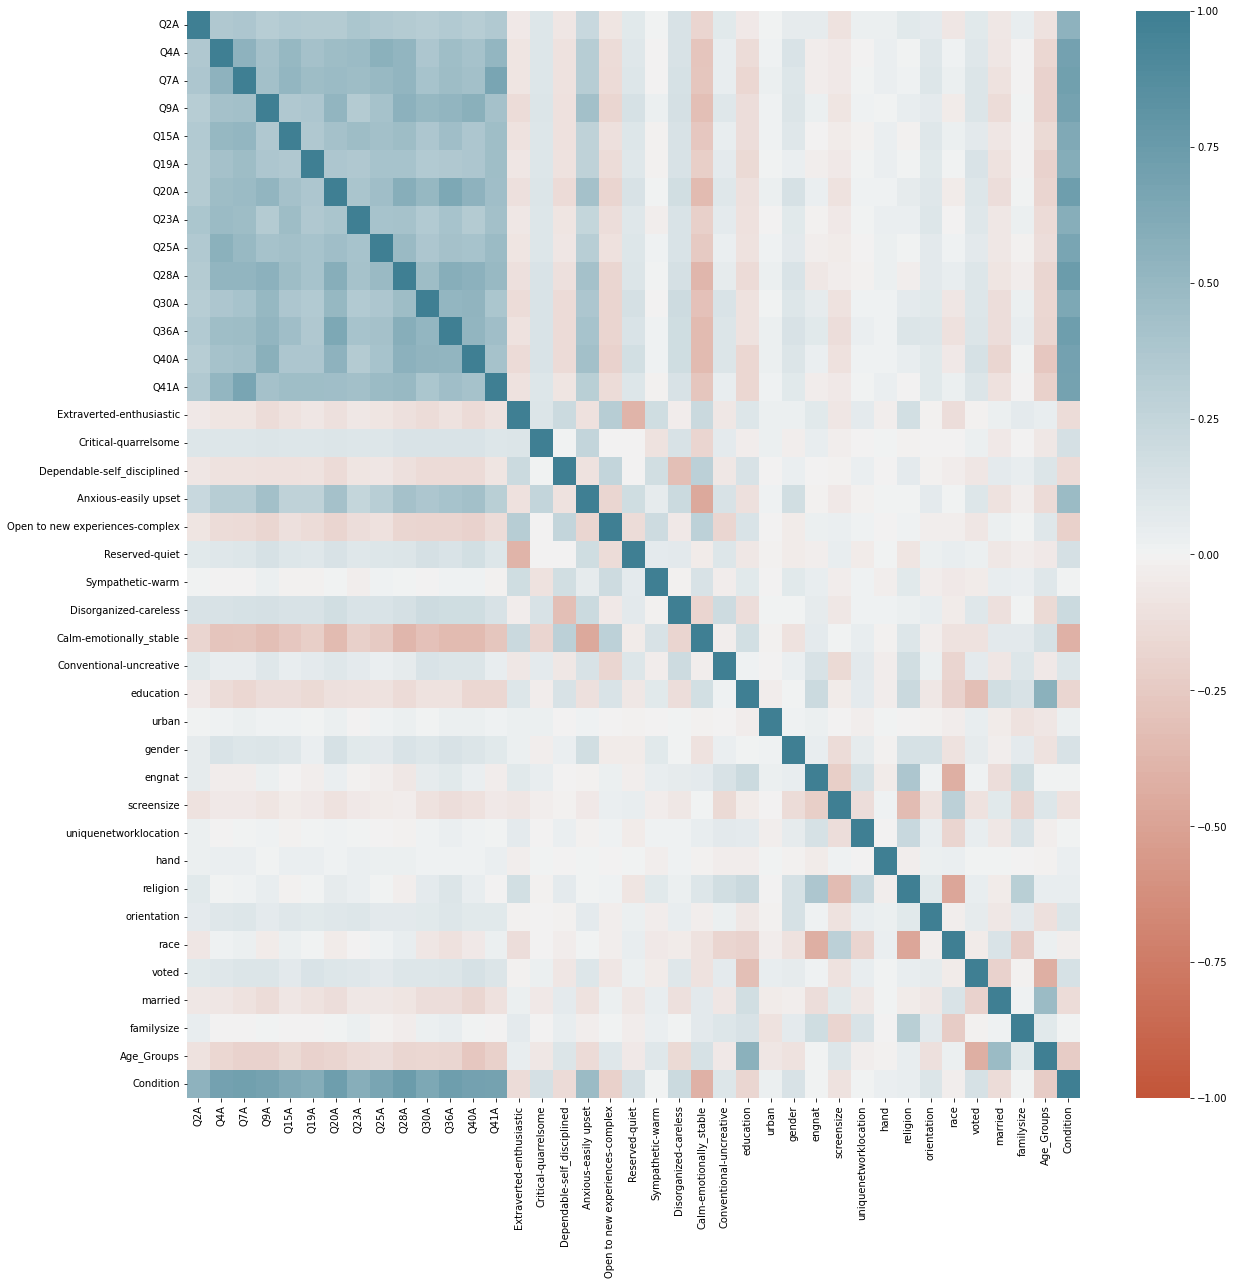

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(Anx.corr(),vmin=-1,vmax=1,cmap=sns.diverging_palette(20,220,n=200))

# **Comparing different answers given for situations like gender, marriage, education, races etc and comparing with their Anxiety, Depression or Stress Conditions**

# Genders

* 1=Male
* 2=Female
* 3=Other

In [32]:
print('Count of People participated as of Gender\n',data_2['gender'].value_counts())

Count of People participated as of Gender
 2    30366
1     8788
3      619
Name: gender, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Depression Condition of Different Gender')

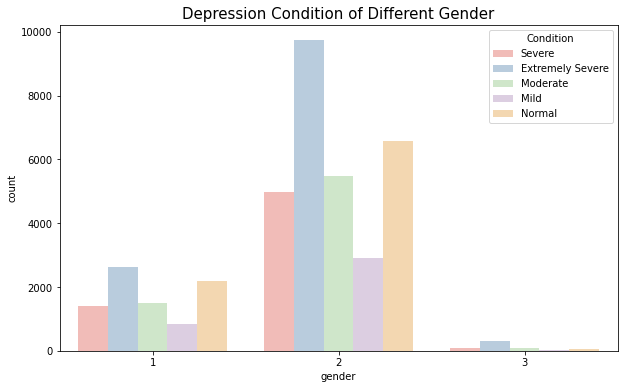

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(Depression.sort_values('gender').gender,hue=Depression['Condition'],palette='Pastel1')
plt.title('Depression Condition of Different Gender',fontsize=15)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Stress Condition of Different Gender')

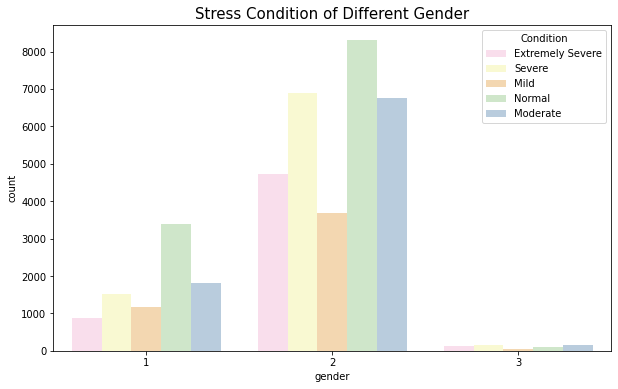

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(Stress.sort_values('gender').gender,hue=Stress['Condition'],palette='Pastel1_r')
plt.title('Stress Condition of Different Gender',fontsize=15)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Anxiety Condition of Different Gender')

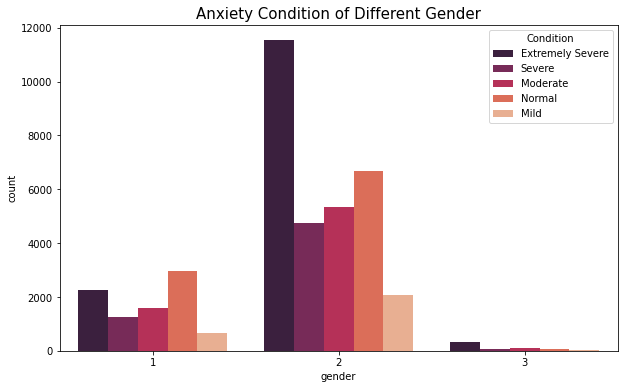

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(Anxiety.sort_values('gender').gender,hue=Anxiety['Condition'],palette='rocket')
plt.title('Anxiety Condition of Different Gender',fontsize=15)

# Martial Status

* 1=Never married
* 2=Currently married
* 3=Previously married

In [36]:
Depression['married'].value_counts()

1    34130
2     4357
3     1286
Name: married, dtype: int64

*People participating were mostly single and not married at the time of answers*

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Depression State of People as of Married or Not')

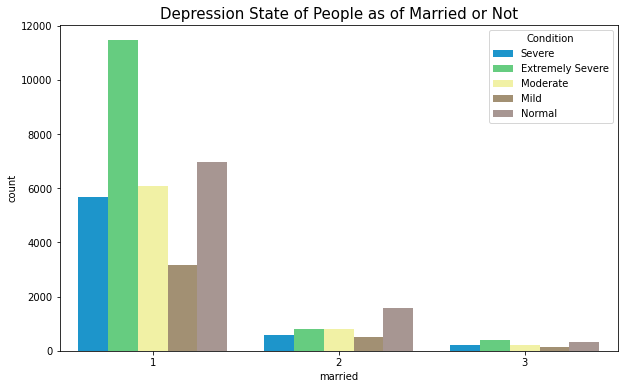

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(Depression.sort_values('married').married,hue=Depression['Condition'],palette='terrain')
plt.title('Depression State of People as of Married or Not',fontsize=15)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Stress State of People as of Married or Not')

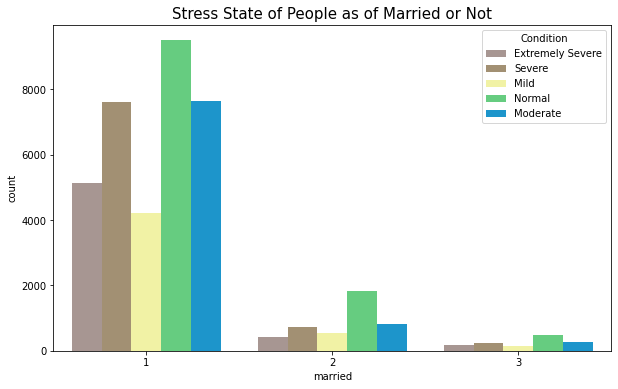

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(Stress.sort_values('married').married,hue=Stress['Condition'],palette='terrain_r')
plt.title('Stress State of People as of Married or Not',fontsize=15)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Anxiety State of People as of Married or Not')

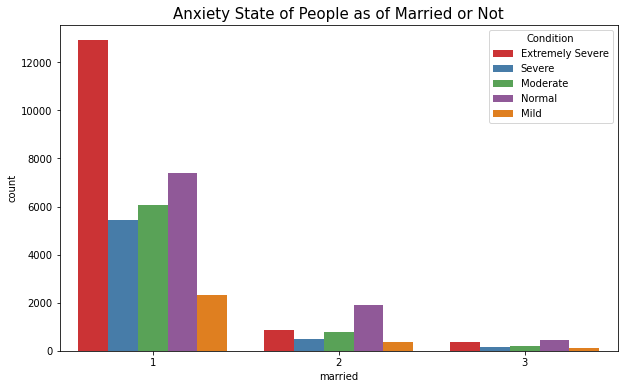

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(Anxiety.sort_values('married').married,hue=Anxiety['Condition'],palette='Set1')
plt.title('Anxiety State of People as of Married or Not',fontsize=15)

**Comparing results**
> Never Married
* Moslty had extremely severe conditions for Depression and Anxiety.

> Married
* Moslty were normal

> Divorced
* As per the people participated Most people were in Extreme Severe for depressive state

# Religions

* 1=Agnostic
* 2=Atheist
* 3=Buddhist
* 4=Christian (Catholic)
* 5=Christian (Mormon)
* 6=Christian (Protestant)
* 7=Christian (Other)
* 8=Hindu
* 9=Jewish 
* 10=Muslim 
* 11=Sikh
* 12=Other

In [40]:
data_2['religion'].value_counts(ascending=True)

11       64
5       122
9       144
8       700
3       882
6      1544
12     1804
7      2254
4      3097
1      3244
2      3845
10    22073
Name: religion, dtype: int64

*People who participated to answers were moslty from Muslim religion*

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Depression Condition as per Religion')

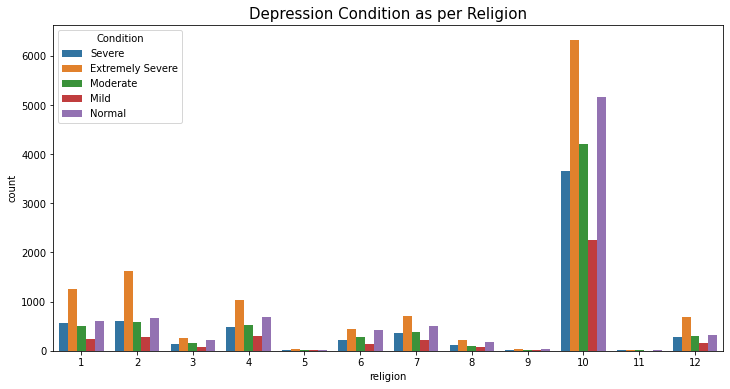

In [41]:
plt.figure(figsize=(12,6))
a=sns.countplot(Depression.sort_values('religion').religion,hue=Depression['Condition'])
plt.title('Depression Condition as per Religion',fontsize=15)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Stress Condition as per Religion')

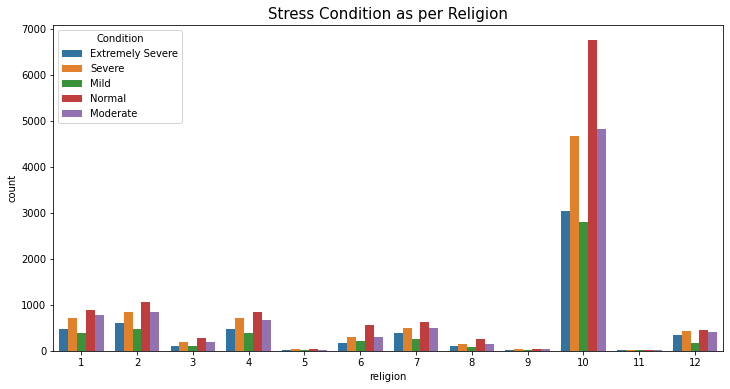

In [42]:
plt.figure(figsize=(12,6))
sns.countplot(Stress.sort_values('religion').religion,hue=Stress['Condition'])
plt.title('Stress Condition as per Religion',fontsize=15)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Anxiety Condition as per Religion')

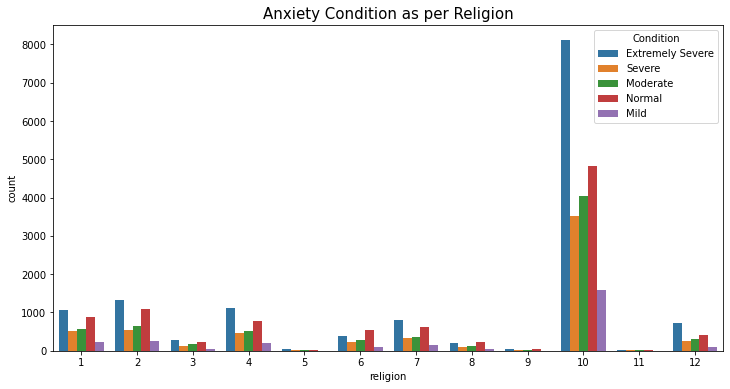

In [43]:
plt.figure(figsize=(12,6))
sns.countplot(Anxiety.sort_values('religion').religion,hue=Anxiety['Condition'])
plt.title('Anxiety Condition as per Religion',fontsize=15)

# Races 

* 10=Asian 
* 20=Arab 
* 30=Black 
* 40=Indigenous Australian 
* 50=Native American
* 60=White
* 70=Other

In [44]:
print('Counts of answered recorded as per races\n',data_2['race'].value_counts())

Counts of answered recorded as per races
 10    23106
60    10657
70     4832
30      603
20      333
50      220
40       22
Name: race, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Depression Condition as per Race')

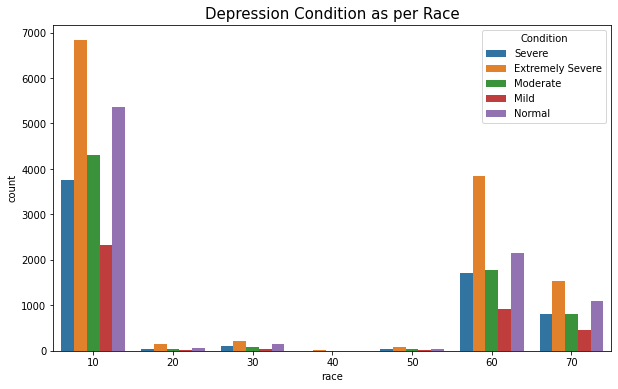

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(Depression.sort_values('race').race,hue=Depression['Condition'])
plt.title('Depression Condition as per Race',fontsize=15)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Stress Condition as per Race')

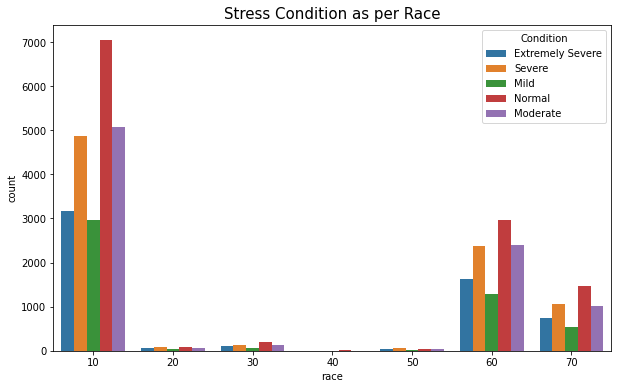

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(Stress.sort_values('race').race,hue=Stress['Condition'])
plt.title('Stress Condition as per Race',fontsize=15)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Anxiety Condition as per Race')

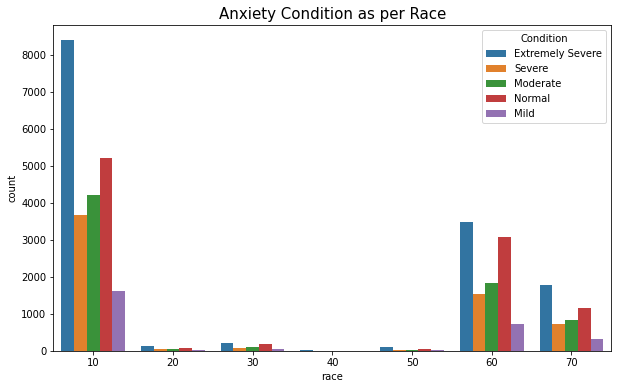

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(Anxiety.sort_values('race').race,hue=Anxiety['Condition'])
plt.title('Anxiety Condition as per Race',fontsize=15)

# Sexual Orientation

* 1=Heterosexual
* 2=Bisexual
* 3=Homosexual 
* 4=Asexual
* 5=Other

In [48]:
print('Count of answered recorded as per sexual Orientation \n',data_2['orientation'].value_counts())

Count of answered recorded as per sexual Orientation 
 1    24269
3     5063
2     5005
5     3460
4     1976
Name: orientation, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Depression Condition as per different sexual Orientations')

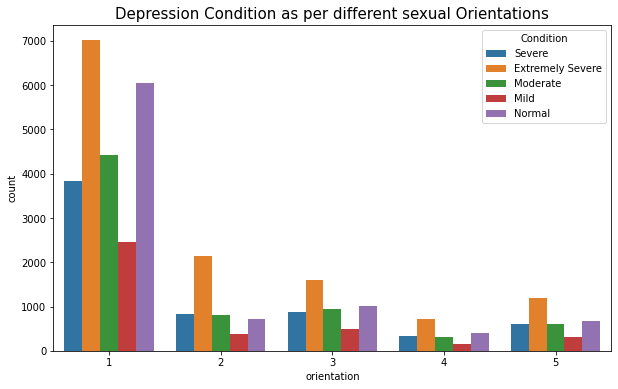

In [49]:
plt.figure(figsize=(10,6))
sns.countplot(Depression.sort_values('orientation').orientation,hue=Depression['Condition'])
plt.title('Depression Condition as per different sexual Orientations',fontsize=15)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Stress Condition as per different sexual Orientations')

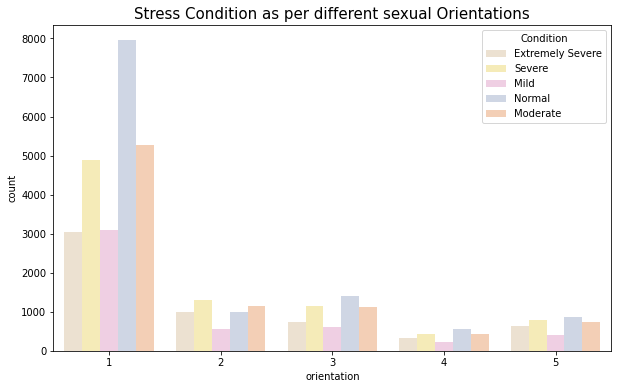

In [50]:
plt.figure(figsize=(10,6))
sns.countplot(Stress.sort_values('orientation').orientation,hue=Stress['Condition'],palette='Pastel2_r')
plt.title('Stress Condition as per different sexual Orientations',fontsize=15)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Anxiety Condition as per different sexual Orientations')

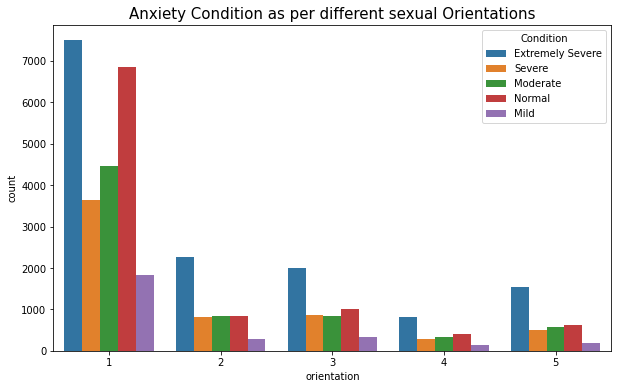

In [51]:
plt.figure(figsize=(10,6))
sns.countplot(Anxiety.sort_values('orientation').orientation,hue=Anxiety['Condition'])
plt.title('Anxiety Condition as per different sexual Orientations',fontsize=15)

**All different sexual orientations given the participation,mostly were extremely severe for Depression and Anxiety**

# Age Groups

*Where*
* Under 10
* Primary(10-16)
* Secondary(17-21)
* Adults(21-35)
* Elder Adults(36-48)
* Older people(49+)
       

In [52]:
print('Counts of answered recorded as per age groups\n',data_2['Age_Groups'].value_counts())

Counts of answered recorded as per age groups
 Secondary Children    16188
Adults                15388
 Primary Children      4960
Elder Adults           2081
Older People           1156
Name: Age_Groups, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Depression Condition as per different Age Groups')

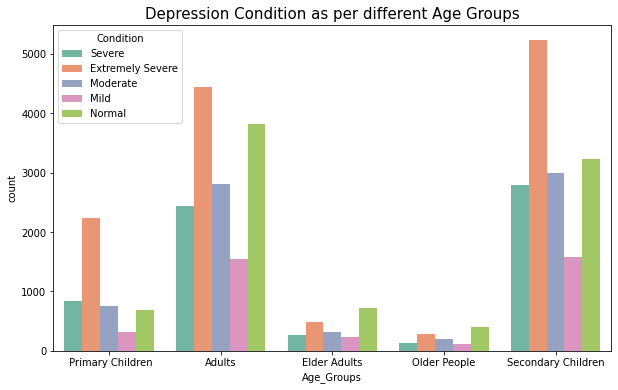

In [53]:
plt.figure(figsize=(10,6))
sns.countplot(Depression.sort_values('Age_Groups').Age_Groups,hue=Depression['Condition'],palette='Set2')
plt.title('Depression Condition as per different Age Groups',fontsize=15)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Stress Condition as per different Age Groups')

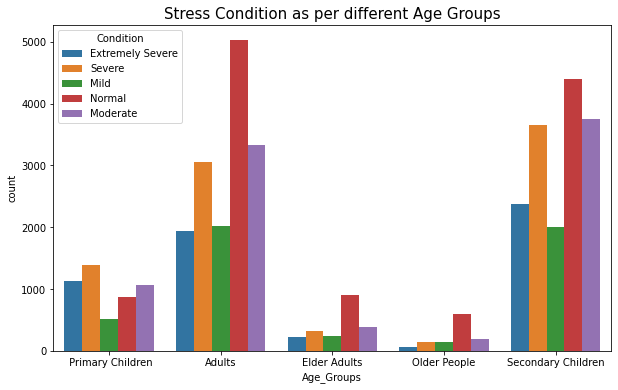

In [54]:
plt.figure(figsize=(10,6))
sns.countplot(Stress.sort_values('Age_Groups').Age_Groups,hue=Stress['Condition'])
plt.title('Stress Condition as per different Age Groups',fontsize=15)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Anxiety Condition as per different Age Groups')

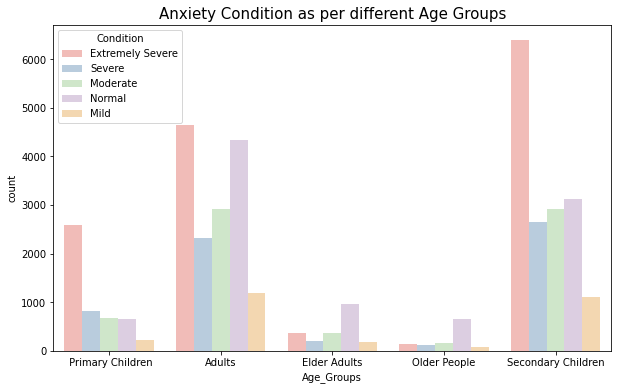

In [55]:
plt.figure(figsize=(10,6))
sns.countplot(Anxiety.sort_values('Age_Groups').Age_Groups,hue=Anxiety['Condition'],palette='Pastel1')
plt.title('Anxiety Condition as per different Age Groups',fontsize=15)

# Education level

*  1=Less than high school 
*  2=High school
*  3=University degree
*  4=Graduate degree

In [56]:
print('Counts of answered recorded as per the Education \n',data_2['education'].value_counts())

Counts of answered recorded as per the Education 
 3    15634
2    15065
4     5008
1     4066
Name: education, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Depression Condition as per different Education levels')

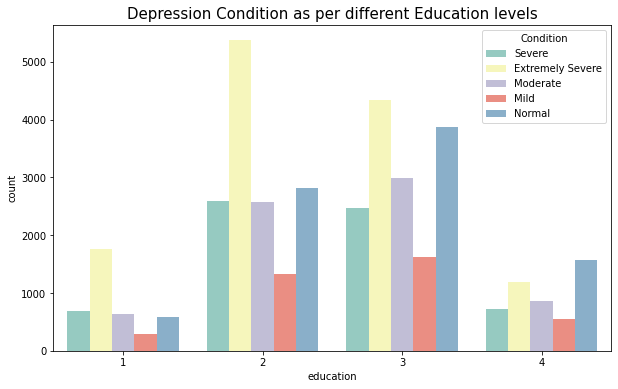

In [57]:
plt.figure(figsize=(10,6))
sns.countplot(Depression.sort_values('education').education,hue=Depression['Condition'],palette='Set3')
plt.title('Depression Condition as per different Education levels',fontsize=15)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Stress Condition as per different Education levels')

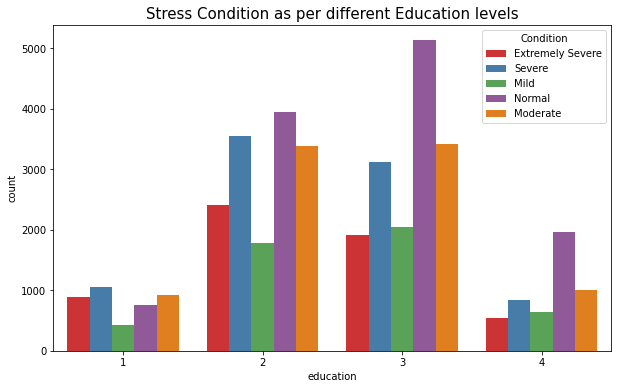

In [58]:
plt.figure(figsize=(10,6))
sns.countplot(Stress.sort_values('education').education,hue=Stress['Condition'],palette='Set1')
plt.title('Stress Condition as per different Education levels',fontsize=15)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Anxiety Condition as per different Education levels')

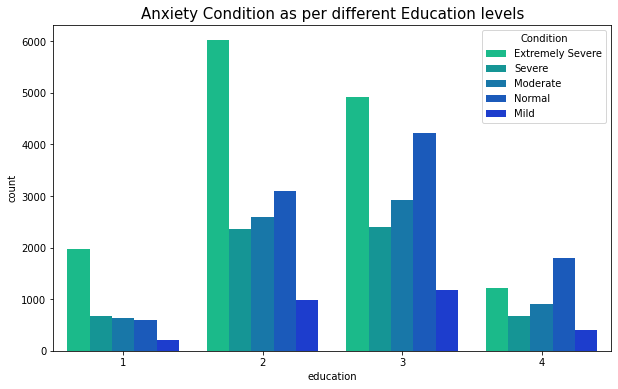

In [59]:
plt.figure(figsize=(10,6))
sns.countplot(Anxiety.sort_values('education').education,hue=Anxiety['Condition'],palette='winter_r')
plt.title('Anxiety Condition as per different Education levels',fontsize=15)

In [60]:
def change_var(x):
    if x=='Primary Children':
        return 0
    elif x=='Secondary Children':
        return 1
    elif x=='Adults':
        return 2
    elif x=='Elder Adults':
        return 3
    elif x=='Older People':
        return 4
    

    
Depression['Age_Groups']=Depression['Age_Groups'].apply(change_var)
Stress['Age_Groups']=Stress['Age_Groups'].apply(change_var)
Anxiety['Age_Groups']=Anxiety['Age_Groups'].apply(change_var)



In [61]:
Depression=Depression.dropna()
Stress=Stress.dropna()
Anxiety=Anxiety.dropna()

In [62]:
Depression=Depression.drop(columns=['Total_Count','country','age'])
Stress=Stress.drop(columns=['Total_Count','country','age'])
Anxiety=Anxiety.drop(columns=['Total_Count','country','age'])


# Model Creation for predictions

In [63]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score,precision_score, recall_score, f1_score,roc_auc_score,classification_report,mean_squared_error

 >  # 1. Model for Depression

In [64]:
scaler=MinMaxScaler()
X=Depression[['Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A', 'Q21A', 'Q24A', 'Q26A',
       'Q31A', 'Q34A', 'Q37A', 'Q38A', 'Q42A',
       'Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
        'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
        'Disorganized-careless', 'Calm-emotionally_stable',
        'Conventional-uncreative', 'education', 'urban', 'gender', 'engnat',
        'screensize', 'uniquenetworklocation', 'hand', 'religion',
        'orientation', 'race', 'voted', 'married', 'familysize',
        'Age_Groups']]
y=Depression[['Condition']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
print('Training Set:',X_train.shape,y_train.shape)
print('Test Set:',X_test.shape,y_test.shape)

Training Set: (22133, 38) (22133, 1)
Test Set: (11918, 38) (11918, 1)


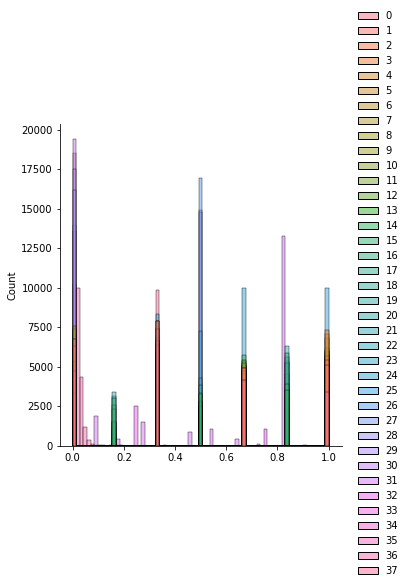

In [66]:
sns.displot(X_train_scaled)

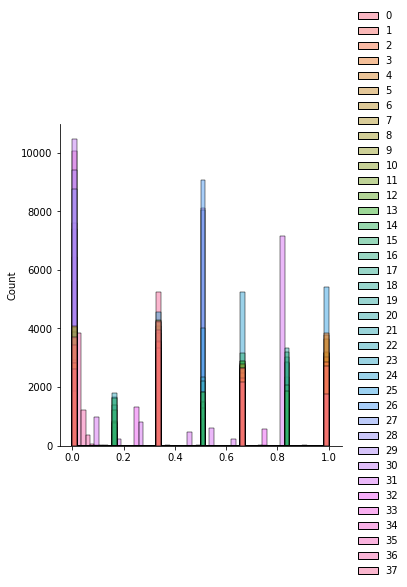

In [67]:
sns.displot(X_test_scaled)

**Random Forest**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Accuracy: 0.926
F1_Score: 0.924
Recall_Score: 0.926
Precision_Score: 0.926


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 

Cross Validation Score: 0.925
                  precision    recall  f1-score   support

Extremely Severe     0.9852    0.9871    0.9862      3644
            Mild     0.8798    0.6466    0.7454      1245
        Moderate     0.8532    0.9160    0.8835      2215
          Normal     0.9336    0.9857    0.9589      2865
          Severe     0.9159    0.9159    0.9159      1949

        accuracy                         0.9263     11918
       macro avg     0.9135    0.8903    0.8980     11918
    weighted avg     0.9259    0.9263    0.9239     11918



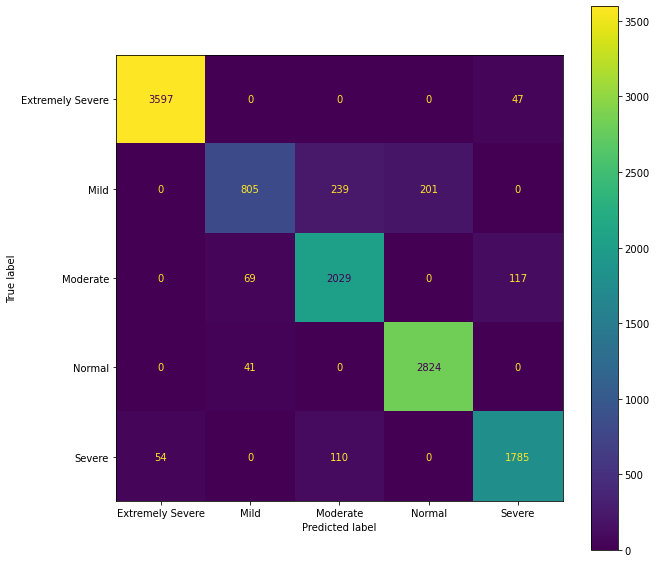

In [68]:
RanFor=RandomForestClassifier(n_estimators=190,min_samples_split=3,min_samples_leaf=1,max_depth=160,max_features='auto').fit(X_train_scaled,y_train)
Acc_ran=round(accuracy_score(y_test,RanFor.predict(X_test_scaled)),3)
f1_ran=round(f1_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
recall_ran=round(recall_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
precision_ran=round(precision_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_ran)
print('F1_Score:',f1_ran)
print('Recall_Score:',recall_ran)
print('Precision_Score:',precision_ran)
print('Cross Validation Score:',round(np.mean(cross_val_score(RanFor, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=RanFor.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(RanFor,X_test_scaled,y_test,ax=ax)

**2. Decision Trees**

Accuracy: 0.795
F1_Score: 0.795
Recall_Score: 0.795
Precision_Score: 0.796
Cross Validation Score: 0.791
                  precision    recall  f1-score   support

Extremely Severe     0.9250    0.9314    0.9282      3644
            Mild     0.5211    0.5558    0.5379      1245
        Moderate     0.6826    0.6853    0.6839      2215
          Normal     0.9030    0.8970    0.9000      2865
          Severe     0.7007    0.6655    0.6826      1949

        accuracy                         0.7947     11918
       macro avg     0.7465    0.7470    0.7465     11918
    weighted avg     0.7958    0.7947    0.7951     11918



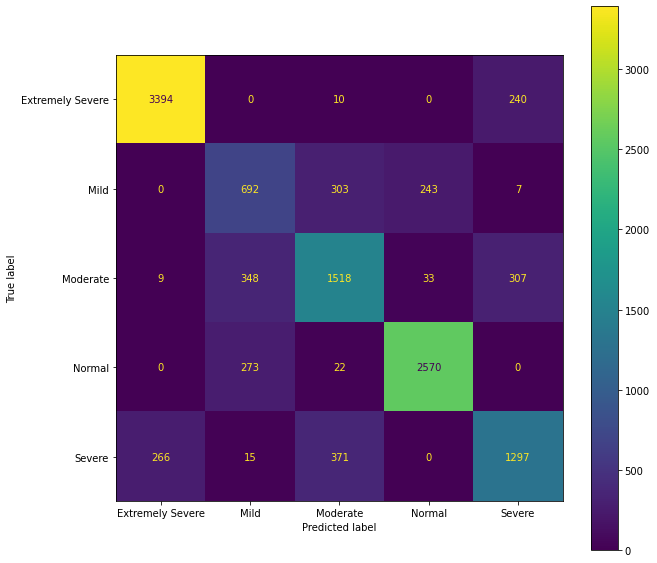

In [69]:
DT=DecisionTreeClassifier(criterion='entropy',splitter='best',min_samples_split=9,min_samples_leaf=2,max_depth=100).fit(X_train_scaled,y_train)
Acc_dt=round(accuracy_score(y_test,DT.predict(X_test_scaled)),3)
f1_dt=round(f1_score(y_test,DT.predict(X_test_scaled),average='weighted'),3)
recall_dt=round(recall_score(y_test,DT.predict(X_test_scaled),average='weighted'),3)
precision_dt=round(precision_score(y_test,DT.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_dt)
print('F1_Score:',f1_dt)
print('Recall_Score:',recall_dt)
print('Precision_Score:',precision_dt)
print('Cross Validation Score:',round(np.mean(cross_val_score(DT, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=DT.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(DT,X_test_scaled,y_test,ax=ax)

**Logistic Regression**

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 1.0
F1_Score: 1.0
Recall_Score: 1.0
Precision_Score: 1.0


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

Cross Validation Score: 1.0
                  precision    recall  f1-score   support

Extremely Severe     1.0000    1.0000    1.0000      3644
            Mild     1.0000    1.0000    1.0000      1245
        Moderate     0.9995    1.0000    0.9998      2215
          Normal     1.0000    1.0000    1.0000      2865
          Severe     1.0000    0.9995    0.9997      1949

        accuracy                         0.9999     11918
       macro avg     0.9999    0.9999    0.9999     11918
    weighted avg     0.9999    0.9999    0.9999     11918



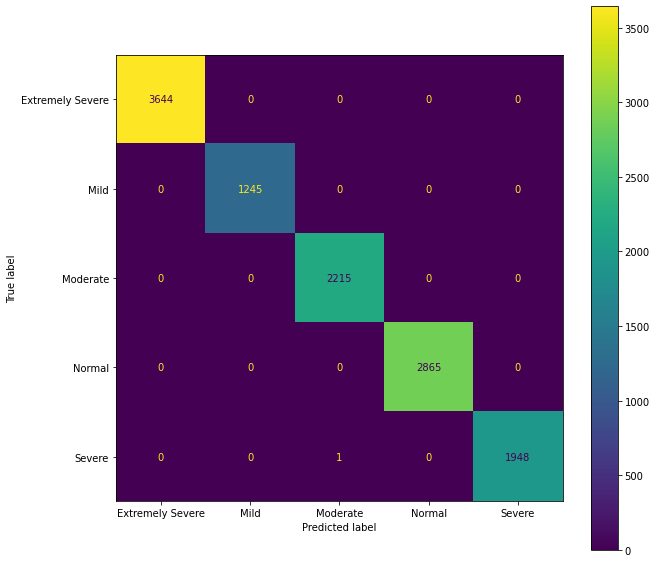

In [70]:
lr=LogisticRegression(solver='newton-cg').fit(X_train_scaled,y_train)
Acc_lr=round(accuracy_score(y_test,lr.predict(X_test_scaled)),3)
f1_lr=round(f1_score(y_test,lr.predict(X_test_scaled),average='weighted'),3)
recall_lr=round(recall_score(y_test,lr.predict(X_test_scaled),average='weighted'),3)
precision_lr=round(precision_score(y_test,lr.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_lr)
print('F1_Score:',f1_lr)
print('Recall_Score:',recall_lr)
print('Precision_Score:',precision_lr)
print('Cross Validation Score:',round(np.mean(cross_val_score(lr, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=lr.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(lr,X_test_scaled,y_test,ax=ax)

**Gaussian Naive Bayes**

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.872
F1_Score: 0.877
Recall_Score: 0.872
Precision_Score: 0.894


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

Cross Validation Score: 0.873
                  precision    recall  f1-score   support

Extremely Severe     0.9997    0.8773    0.9345      3644
            Mild     0.6292    0.8313    0.7163      1245
        Moderate     0.8574    0.8524    0.8549      2215
          Normal     0.9947    0.8510    0.9172      2865
          Severe     0.7568    0.9405    0.8387      1949

        accuracy                         0.8719     11918
       macro avg     0.8476    0.8705    0.8523     11918
    weighted avg     0.8936    0.8719    0.8771     11918



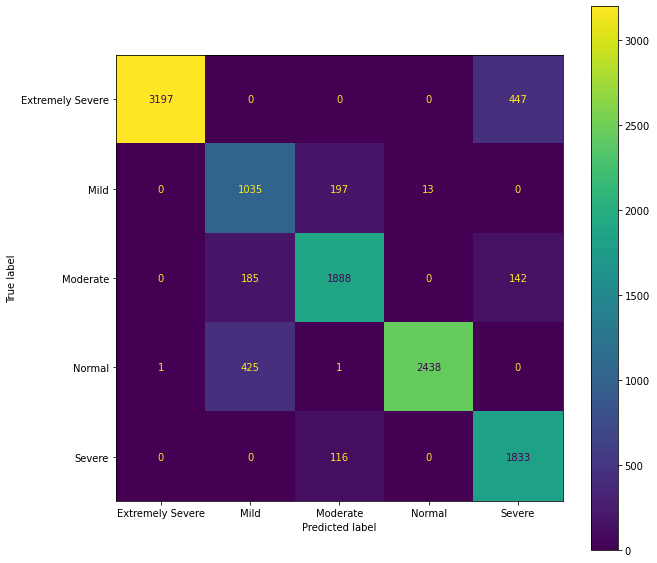

In [71]:
gb=GaussianNB().fit(X_train_scaled,y_train)
Acc_gb=round(accuracy_score(y_test,gb.predict(X_test_scaled)),3)
f1_gb=round(f1_score(y_test,gb.predict(X_test_scaled),average='weighted'),3)
recall_gb=round(recall_score(y_test,gb.predict(X_test_scaled),average='weighted'),3)
precision_gb=round(precision_score(y_test,gb.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_gb)
print('F1_Score:',f1_gb)
print('Recall_Score:',recall_gb)
print('Precision_Score:',precision_gb)
print('Cross Validation Score:',round(np.mean(cross_val_score(gb, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=gb.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(gb,X_test_scaled,y_test,ax=ax)

**Nearest Neighbours**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


Accuracy: 0.87
F1_Score: 0.863
Recall_Score: 0.87
Precision_Score: 0.871


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when

Cross Validation Score: 0.866
                  precision    recall  f1-score   support

Extremely Severe     0.9645    0.9849    0.9746      3644
            Mild     0.7353    0.4530    0.5606      1245
        Moderate     0.7394    0.8966    0.8104      2215
          Normal     0.8776    0.9832    0.9274      2865
          Severe     0.9218    0.7255    0.8119      1949

        accuracy                         0.8701     11918
       macro avg     0.8477    0.8087    0.8170     11918
    weighted avg     0.8708    0.8701    0.8629     11918



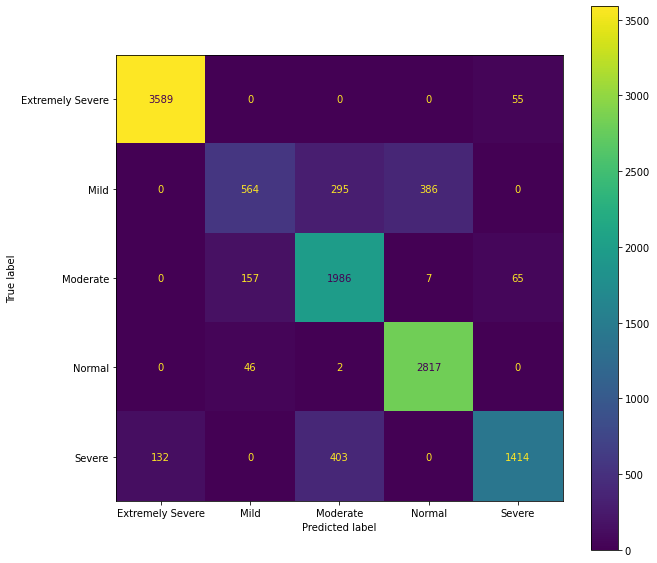

In [72]:
knn=KNeighborsClassifier(n_neighbors=15).fit(X_train_scaled,y_train)
Acc_knn=round(accuracy_score(y_test,knn.predict(X_test_scaled)),3)
f1_knn=round(f1_score(y_test,knn.predict(X_test_scaled),average='weighted'),3)
recall_knn=round(recall_score(y_test,knn.predict(X_test_scaled),average='weighted'),3)
precision_knn=round(precision_score(y_test,knn.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_knn)
print('F1_Score:',f1_knn)
print('Recall_Score:',recall_knn)
print('Precision_Score:',precision_knn)
print('Cross Validation Score:',round(np.mean(cross_val_score(knn, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=knn.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(knn,X_test_scaled,y_test,ax=ax)

**Support Vector Machines**

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.987
F1_Score: 0.987
Recall_Score: 0.987
Precision_Score: 0.987


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

Cross Validation Score: 0.987
                  precision    recall  f1-score   support

Extremely Severe     1.0000    1.0000    1.0000      3644
            Mild     0.9618    0.9510    0.9564      1245
        Moderate     0.9723    0.9837    0.9780      2215
          Normal     0.9889    0.9920    0.9904      2865
          Severe     0.9938    0.9831    0.9884      1949

        accuracy                         0.9872     11918
       macro avg     0.9834    0.9820    0.9826     11918
    weighted avg     0.9872    0.9872    0.9872     11918



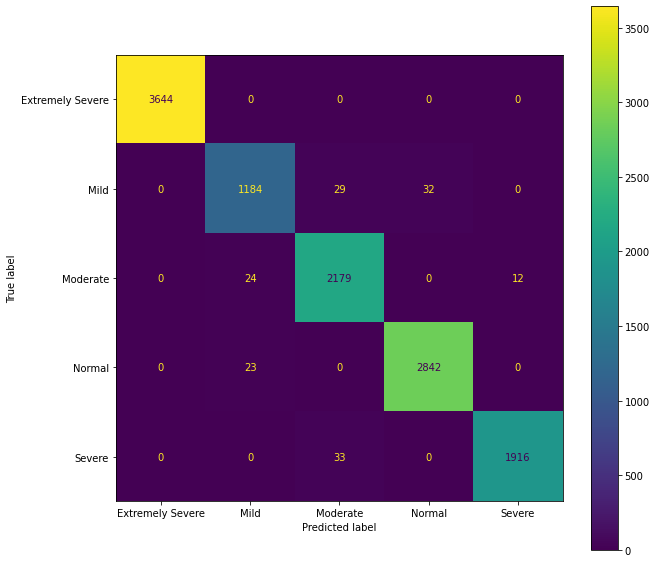

In [73]:
from sklearn.svm import SVC
svm=SVC().fit(X_train_scaled,y_train)
Acc_svm=round(accuracy_score(y_test,svm.predict(X_test_scaled)),3)
f1_svm=round(f1_score(y_test,svm.predict(X_test_scaled),average='weighted'),3)
recall_svm=round(recall_score(y_test,svm.predict(X_test_scaled),average='weighted'),3)
precision_svm=round(precision_score(y_test,svm.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_svm)
print('F1_Score:',f1_svm)
print('Recall_Score:',recall_svm)
print('Precision_Score:',precision_svm)
print('Cross Validation Score:',round(np.mean(cross_val_score(svm, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=svm.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(svm,X_test_scaled,y_test,ax=ax)

In [120]:
Result={
                  'Model':['Random-Forest','Decision-Tree','Logistic-Regression','GaussianNB','Nearest-Neighbors','SVM'],
                  'Accuracy(%)':[Acc_ran*100,Acc_dt*100,Acc_lr*100,Acc_gb*100,Acc_knn*100,Acc_svm*100],
                  'F1_Score(%)':[f1_ran*100,f1_dt*100,f1_lr*100,f1_gb*100,f1_knn*100,f1_svm*100],
                  'Precision(%)':[precision_ran*100,precision_dt*100,precision_lr*100,precision_gb*100,precision_knn*100,precision_svm*100],
                  'Recall(%)':[recall_ran*100,recall_dt*100,recall_lr*100,recall_gb*100,recall_knn*100,recall_svm*100],
                    }
Result_Depression=pd.DataFrame(Result)

                                                                                            
                                                                                                                

# 2. Model For Stress

In [75]:
Stress.columns

Index(['Q1A', 'Q6A', 'Q8A', 'Q11A', 'Q12A', 'Q14A', 'Q18A', 'Q22A', 'Q27A',
       'Q29A', 'Q32A', 'Q33A', 'Q35A', 'Q39A', 'Extraverted-enthusiastic',
       'Critical-quarrelsome', 'Dependable-self_disciplined',
       'Anxious-easily upset', 'Open to new experiences-complex',
       'Reserved-quiet', 'Sympathetic-warm', 'Disorganized-careless',
       'Calm-emotionally_stable', 'Conventional-uncreative', 'education',
       'urban', 'gender', 'engnat', 'screensize', 'uniquenetworklocation',
       'hand', 'religion', 'orientation', 'race', 'voted', 'married',
       'familysize', 'major', 'Age_Groups', 'Condition'],
      dtype='object')

In [76]:
scaler=MinMaxScaler()
X=Stress[['Q1A', 'Q6A', 'Q8A', 'Q11A', 'Q12A', 'Q14A', 'Q18A', 'Q22A', 'Q27A',
       'Q29A', 'Q32A', 'Q33A', 'Q35A', 'Q39A',
       'Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
        'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
        'Disorganized-careless', 'Calm-emotionally_stable',
        'Conventional-uncreative', 'education', 'urban', 'gender', 'engnat',
        'screensize', 'uniquenetworklocation', 'hand', 'religion',
        'orientation', 'race', 'voted', 'married', 'familysize',
        'Age_Groups']]
y=Stress[['Condition']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Random Forest**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Accuracy: 0.885
F1_Score: 0.882
Recall_Score: 0.885
Precision_Score: 0.884


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 

Cross Validation Score: 0.8827116398433882
                  precision    recall  f1-score   support

Extremely Severe     0.9688    0.9019    0.9341      1620
            Mild     0.8071    0.5876    0.6801      1552
        Moderate     0.8162    0.9001    0.8561      2713
          Normal     0.9335    0.9701    0.9515      3818
          Severe     0.8759    0.9130    0.8941      2482

        accuracy                         0.8851     12185
       macro avg     0.8803    0.8545    0.8632     12185
    weighted avg     0.8842    0.8851    0.8817     12185



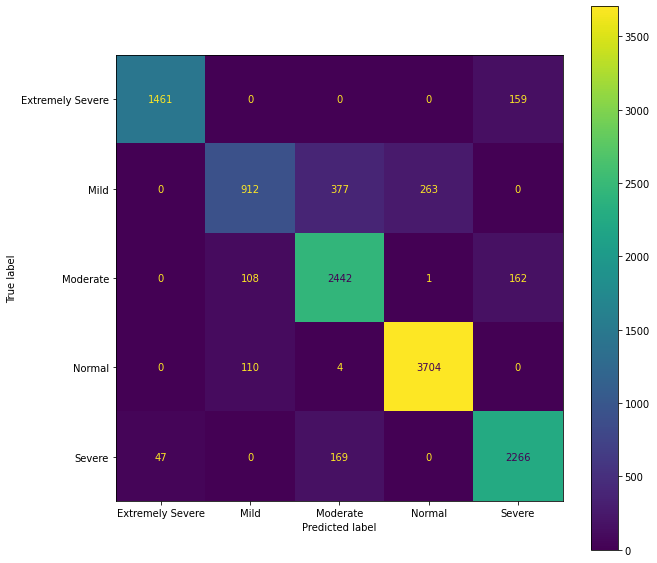

In [77]:
ran=RandomForestClassifier().fit(X_train_scaled,y_train)
acc_ran=round(accuracy_score(y_test,ran.predict(X_test_scaled)),3)
F1_ran=round(f1_score(y_test,ran.predict(X_test_scaled),average='weighted'),3)
prec_ran=round(precision_score(y_test,ran.predict(X_test_scaled),average='weighted'),3)
rec_ran=round(recall_score(y_test,ran.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',acc_ran)
print('F1_Score:',F1_ran)
print('Recall_Score:',rec_ran)
print('Precision_Score:',prec_ran)
print('Cross Validation Score:',(np.mean(cross_val_score(ran, X_train_scaled, y_train, cv = 6))))
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(ran,X_test_scaled,y_test,ax=ax)
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=ran.predict(X_test_scaled))
print(classification)

**Decision Tree**

Accuracy: 0.747
F1_Score: 0.748
Recall_Score: 0.747
Precision_Score: 0.75
Cross Validation Score: 0.7462879841779637
                  precision    recall  f1-score   support

Extremely Severe     0.8430    0.8253    0.8341      1620
            Mild     0.4966    0.5213    0.5086      1552
        Moderate     0.6598    0.6712    0.6654      2713
          Normal     0.9050    0.8756    0.8900      3818
          Severe     0.7103    0.7200    0.7151      2482

        accuracy                         0.7466     12185
       macro avg     0.7229    0.7227    0.7227     12185
    weighted avg     0.7505    0.7466    0.7484     12185



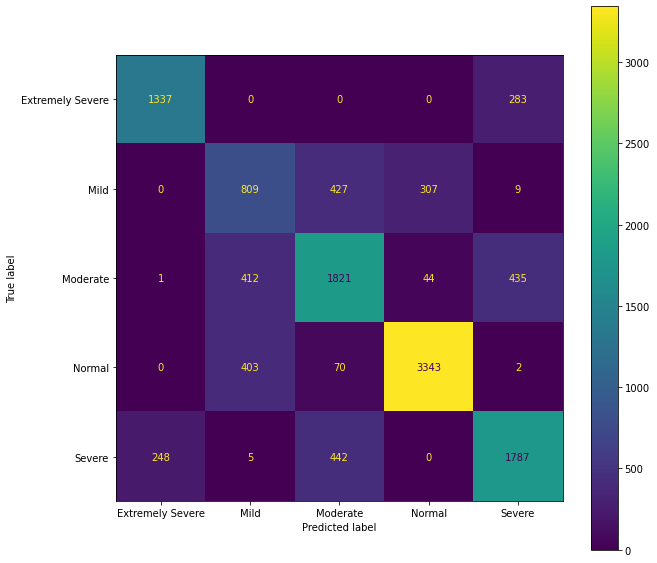

In [78]:
dt=DecisionTreeClassifier(criterion= 'entropy',max_depth= 80, min_samples_leaf= 9, min_samples_split=9).fit(X_train_scaled,y_train)
acc_dt=round(accuracy_score(y_test,dt.predict(X_test_scaled)),3)
F1_dt=round(f1_score(y_test,dt.predict(X_test_scaled),average='weighted'),3)
prec_dt=round(precision_score(y_test,dt.predict(X_test_scaled),average='weighted'),3)
rec_dt=round(recall_score(y_test,dt.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',acc_dt)
print('F1_Score:',F1_dt)
print('Recall_Score:',rec_dt)
print('Precision_Score:',prec_dt)
print('Cross Validation Score:',(np.mean(cross_val_score(dt, X_train_scaled, y_train, cv = 6))))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=dt.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(dt,X_test_scaled,y_test,ax=ax)

**Logisitic Regression**

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 1.0
F1_Score: 1.0
Recall_Score: 1.0
Precision_Score: 1.0


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

Cross Validation Score: 0.9999558030584282
                  precision    recall  f1-score   support

Extremely Severe     1.0000    1.0000    1.0000      1620
            Mild     1.0000    1.0000    1.0000      1552
        Moderate     1.0000    1.0000    1.0000      2713
          Normal     1.0000    1.0000    1.0000      3818
          Severe     1.0000    1.0000    1.0000      2482

        accuracy                         1.0000     12185
       macro avg     1.0000    1.0000    1.0000     12185
    weighted avg     1.0000    1.0000    1.0000     12185



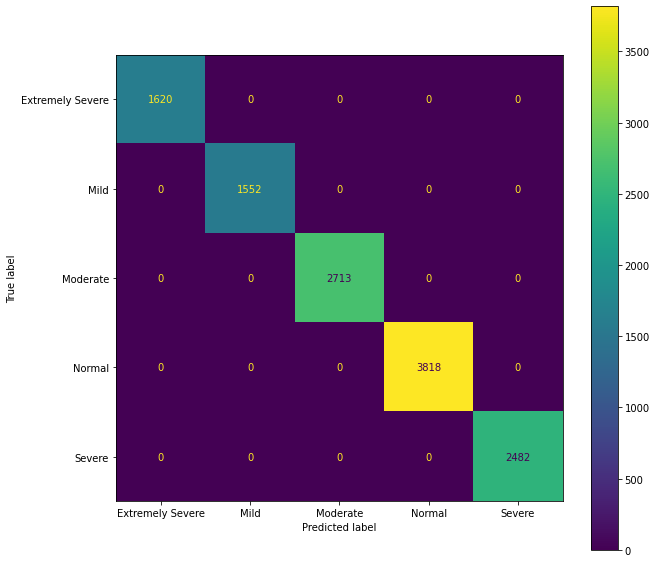

In [79]:
Lr=LogisticRegression(solver='newton-cg').fit(X_train_scaled,y_train)
acc_lr=accuracy_score(y_test,Lr.predict(X_test_scaled))
F1_lr=f1_score(y_test,Lr.predict(X_test_scaled),average='weighted')
prec_lr=precision_score(y_test,Lr.predict(X_test_scaled),average='weighted')
rec_lr=recall_score(y_test,Lr.predict(X_test_scaled),average='weighted')
print('Accuracy:',acc_lr)
print('F1_Score:',F1_lr)
print('Recall_Score:',rec_lr)
print('Precision_Score:',prec_lr)
print('Cross Validation Score:',(np.mean(cross_val_score(Lr, X_train_scaled, y_train, cv = 6))))
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(Lr,X_test_scaled,y_test,ax=ax)
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Lr.predict(X_test_scaled))
print(classification)

**Gaussian Naive Bayes**

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.848
F1_Score: 0.853
Recall_Score: 0.848
Precision_Score: 0.867


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

Cross Validation Score: 0.8488155149356135
                  precision    recall  f1-score   support

Extremely Severe     0.9525    0.8673    0.9079      1620
            Mild     0.5958    0.7957    0.6814      1552
        Moderate     0.8209    0.8500    0.8352      2713
          Normal     0.9849    0.8394    0.9064      3818
          Severe     0.8485    0.8799    0.8639      2482

        accuracy                         0.8482     12185
       macro avg     0.8405    0.8465    0.8390     12185
    weighted avg     0.8668    0.8482    0.8534     12185



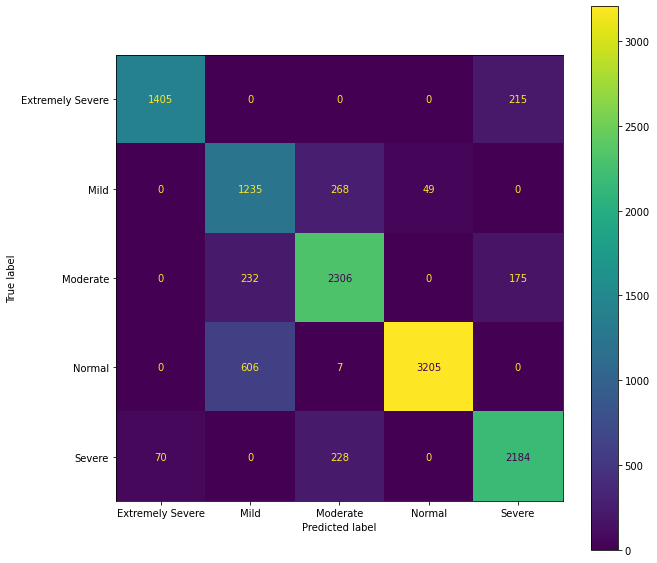

In [80]:
Gb=GaussianNB().fit(X_train_scaled,y_train)
acc_gb=round(accuracy_score(y_test,Gb.predict(X_test_scaled)),3)
F1_gb=round(f1_score(y_test,Gb.predict(X_test_scaled),average='weighted'),3)
prec_gb=round(precision_score(y_test,Gb.predict(X_test_scaled),average='weighted'),3)
rec_gb=round(recall_score(y_test,Gb.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',acc_gb)
print('F1_Score:',F1_gb)
print('Recall_Score:',rec_gb)
print('Precision_Score:',prec_gb)
print('Cross Validation Score:',(np.mean(cross_val_score(Gb, X_train_scaled, y_train, cv = 6))))
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(Gb,X_test_scaled,y_test,ax=ax)
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Gb.predict(X_test_scaled))
print(classification)

**Nearest Neighbors**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


Accuracy: 0.841
F1_Score: 0.839
Recall_Score: 0.841
Precision_Score: 0.838


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when

Cross Validation Score: 0.8419660200977507
                  precision    recall  f1-score   support

Extremely Severe     0.8866    0.9457    0.9152      1620
            Mild     0.6379    0.5947    0.6155      1552
        Moderate     0.8155    0.7917    0.8034      2713
          Normal     0.8880    0.9597    0.9225      3818
          Severe     0.8809    0.7985    0.8377      2482

        accuracy                         0.8411     12185
       macro avg     0.8218    0.8181    0.8189     12185
    weighted avg     0.8384    0.8411    0.8386     12185



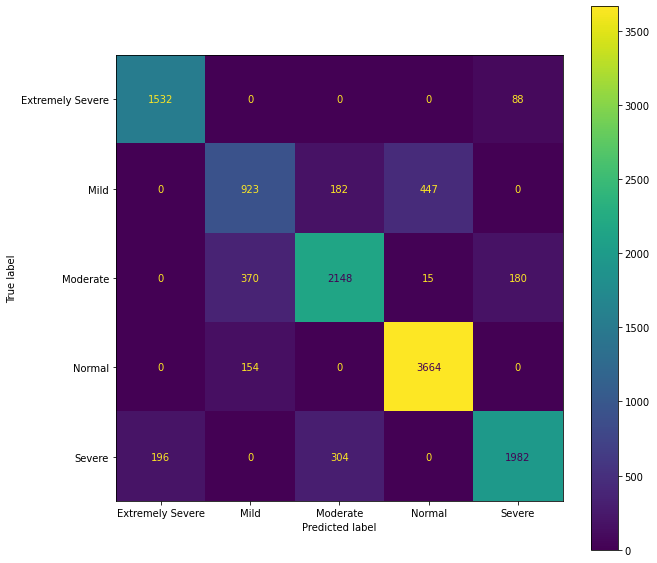

In [81]:
Knn=KNeighborsClassifier(n_neighbors=15).fit(X_train_scaled,y_train)
acc_knn=round(accuracy_score(y_test,Knn.predict(X_test_scaled)),3)
F1_knn=round(f1_score(y_test,Knn.predict(X_test_scaled),average='weighted'),3)
prec_knn=round(precision_score(y_test,Knn.predict(X_test_scaled),average='weighted'),3)
rec_knn=round(recall_score(y_test,Knn.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',acc_knn)
print('F1_Score:',F1_knn)
print('Recall_Score:',rec_knn)
print('Precision_Score:',prec_knn)
print('Cross Validation Score:',(np.mean(cross_val_score(Knn, X_train_scaled, y_train, cv = 6))))
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(Knn,X_test_scaled,y_test,ax=ax)
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Knn.predict(X_test_scaled))
print(classification)

**Support Vector Machines**

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.984
F1_Score: 0.984
Recall_Score: 0.984
Precision_Score: 0.984


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

Cross Validation Score: 0.9843555832829263
                  precision    recall  f1-score   support

Extremely Severe     0.9894    0.9772    0.9832      1620
            Mild     0.9669    0.9787    0.9728      1552
        Moderate     0.9819    0.9801    0.9810      2713
          Normal     0.9968    0.9935    0.9951      3818
          Severe     0.9744    0.9819    0.9781      2482

        accuracy                         0.9841     12185
       macro avg     0.9819    0.9823    0.9821     12185
    weighted avg     0.9841    0.9841    0.9841     12185



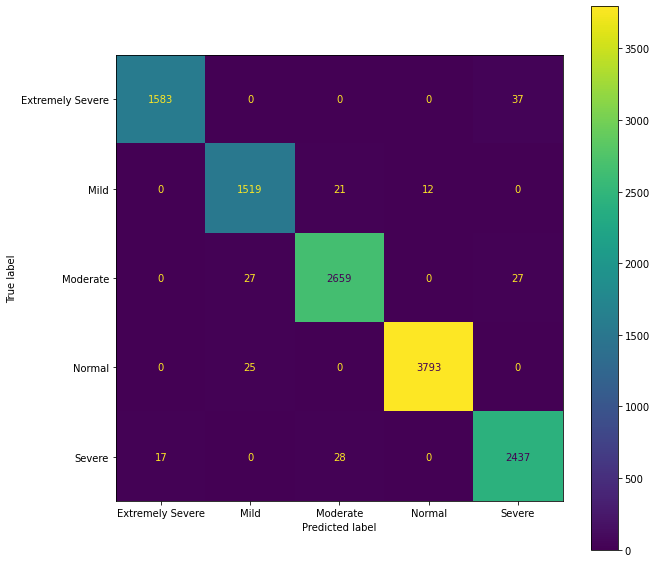

In [82]:
Svm=SVC().fit(X_train_scaled,y_train)
acc_svm=round(accuracy_score(y_test,Svm.predict(X_test_scaled)),3)
F1_svm=round(f1_score(y_test,Svm.predict(X_test_scaled),average='weighted'),3)
prec_svm=round(precision_score(y_test,Svm.predict(X_test_scaled),average='weighted'),3)
rec_svm=round(recall_score(y_test,Svm.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',acc_svm)
print('F1_Score:',F1_svm)
print('Recall_Score:',rec_svm)
print('Precision_Score:',prec_svm)
print('Cross Validation Score:',(np.mean(cross_val_score(Svm, X_train_scaled, y_train, cv = 6))))
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(Svm,X_test_scaled,y_test,ax=ax)
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Svm.predict(X_test_scaled))
print(classification)

In [119]:
Result_1={
                  'Model':['Random-Forest','Decision-Tree','Logistic-Regression','GaussianNB','Nearest-Neighbors','SVM'],
                  'Accuracy(%)':[acc_ran*100,acc_dt*100,acc_lr*100,acc_gb*100,acc_knn*100,acc_svm*100],
                  'F1_Score(%)':[F1_ran*100,F1_dt*100,F1_lr*100,F1_gb*100,F1_knn*100,F1_svm*100],
                  'Precision(%)':[prec_ran*100,prec_dt*100,prec_lr*100,prec_gb*100,prec_knn*100,prec_svm*100],
                  'Recall(%)':[rec_ran*100,rec_dt*100,rec_lr*100,rec_gb*100,rec_knn*100,rec_svm*100]
                    }
Result_Stress=pd.DataFrame(Result_1)


                                                                                            
                                                                                                                

# 3. Model for Anxiety

In [84]:
Anxiety.columns

Index(['Q2A', 'Q4A', 'Q7A', 'Q9A', 'Q15A', 'Q19A', 'Q20A', 'Q23A', 'Q25A',
       'Q28A', 'Q30A', 'Q36A', 'Q40A', 'Q41A', 'Extraverted-enthusiastic',
       'Critical-quarrelsome', 'Dependable-self_disciplined',
       'Anxious-easily upset', 'Open to new experiences-complex',
       'Reserved-quiet', 'Sympathetic-warm', 'Disorganized-careless',
       'Calm-emotionally_stable', 'Conventional-uncreative', 'education',
       'urban', 'gender', 'engnat', 'screensize', 'uniquenetworklocation',
       'hand', 'religion', 'orientation', 'race', 'voted', 'married',
       'familysize', 'major', 'Age_Groups', 'Condition'],
      dtype='object')

In [85]:
scaler=MinMaxScaler()
X=Anxiety[['Q2A', 'Q4A', 'Q7A', 'Q9A', 'Q15A', 'Q19A', 'Q20A', 'Q23A', 'Q25A',
       'Q28A', 'Q30A', 'Q36A', 'Q40A', 'Q41A',
       'Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
        'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
        'Disorganized-careless', 'Calm-emotionally_stable',
        'Conventional-uncreative', 'education', 'urban', 'gender', 'engnat',
        'screensize', 'uniquenetworklocation', 'hand', 'religion',
        'orientation', 'race', 'voted', 'married', 'familysize',
        'Age_Groups']]
y=Anxiety[['Condition']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Random Forest**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Accuracy: 0.847
F1_Score: 0.824
Recall_Score: 0.84
Precision_Score: 0.847


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 

Cross Validation Score: 0.8481529240424707
                  precision    recall  f1-score   support

Extremely Severe     0.9312    0.9678    0.9491      4039
            Mild     0.6957    0.1062    0.1843       904
        Moderate     0.7116    0.8823    0.7878      2234
          Normal     0.8803    0.9881    0.9311      3185
          Severe     0.7979    0.6583    0.7214      1823

        accuracy                         0.8472     12185
       macro avg     0.8033    0.7205    0.7147     12185
    weighted avg     0.8402    0.8472    0.8240     12185



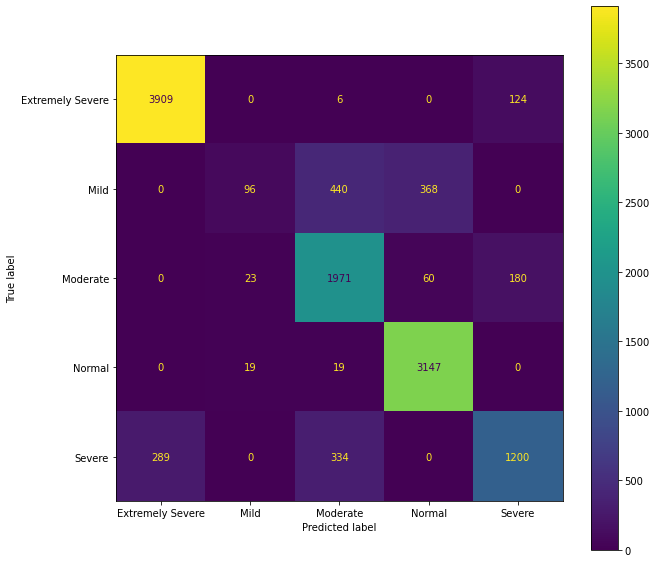

In [86]:
rand=RandomForestClassifier(criterion='entropy').fit(X_train_scaled,y_train)
accu_ran=round(accuracy_score(y_test,rand.predict(X_test_scaled)),3)
f1_score_ran=round(f1_score(y_test,rand.predict(X_test_scaled),average='weighted'),3)
Precision_ran=round(precision_score(y_test,rand.predict(X_test_scaled),average='weighted'),3)
Recall_ran=round(recall_score(y_test,rand.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',accu_ran)
print('F1_Score:',f1_score_ran)
print('Recall_Score:',Precision_ran)
print('Precision_Score:',Recall_ran)
print('Cross Validation Score:',(np.mean(cross_val_score(rand, X_train_scaled, y_train, cv = 6))))
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(rand,X_test_scaled,y_test,ax=ax)
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=rand.predict(X_test_scaled))
print(classification)

**Decision Tree**

Accuracy: 0.735
F1_Score: 0.734
Recall_Score: 0.732
Precision_Score: 0.735
Cross Validation Score: 0.7265777300469556
                  precision    recall  f1-score   support

Extremely Severe     0.8838    0.8903    0.8870      4039
            Mild     0.3497    0.3308    0.3400       904
        Moderate     0.5853    0.5971    0.5912      2234
          Normal     0.8806    0.8867    0.8836      3185
          Severe     0.5087    0.4953    0.5019      1823

        accuracy                         0.7350     12185
       macro avg     0.6416    0.6400    0.6407     12185
    weighted avg     0.7325    0.7350    0.7337     12185



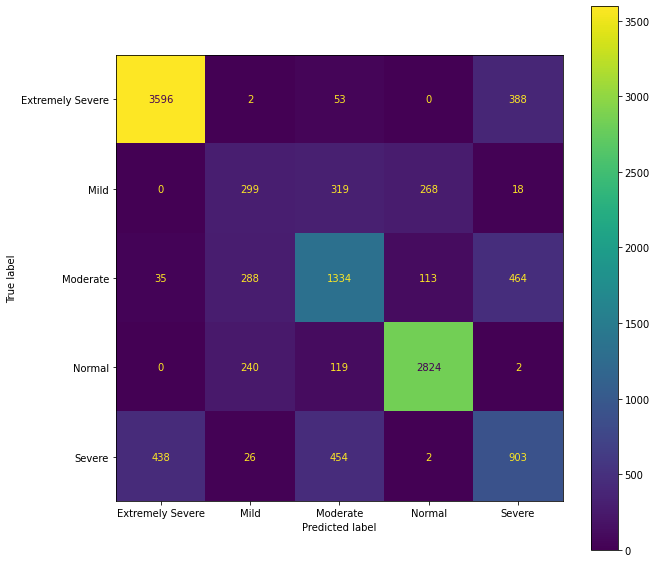

In [87]:
Dt=DecisionTreeClassifier(criterion='entropy',max_depth=100,min_samples_leaf=9,min_samples_split=3).fit(X_train_scaled,y_train)
accu_dt=round(accuracy_score(y_test,Dt.predict(X_test_scaled)),3)
f1_score_dt=round(f1_score(y_test,Dt.predict(X_test_scaled),average='weighted'),3)
Precision_dt=round(precision_score(y_test,Dt.predict(X_test_scaled),average='weighted'),3)
Recall_dt=round(recall_score(y_test,Dt.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',accu_dt)
print('F1_Score:',f1_score_dt)
print('Recall_Score:',Precision_dt)
print('Precision_Score:',Recall_dt)
print('Cross Validation Score:',(np.mean(cross_val_score(Dt, X_train_scaled, y_train, cv = 6))))
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(Dt,X_test_scaled,y_test,ax=ax)
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Dt.predict(X_test_scaled))
print(classification)

**Logistic Regression**

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 1.0
F1_Score: 1.0
Recall_Score: 1.0
Precision_Score: 1.0


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

Cross Validation Score: 0.9996906331261092
                  precision    recall  f1-score   support

Extremely Severe     1.0000    0.9998    0.9999      4039
            Mild     1.0000    0.9989    0.9994       904
        Moderate     0.9996    1.0000    0.9998      2234
          Normal     1.0000    1.0000    1.0000      3185
          Severe     0.9995    1.0000    0.9997      1823

        accuracy                         0.9998     12185
       macro avg     0.9998    0.9997    0.9998     12185
    weighted avg     0.9998    0.9998    0.9998     12185



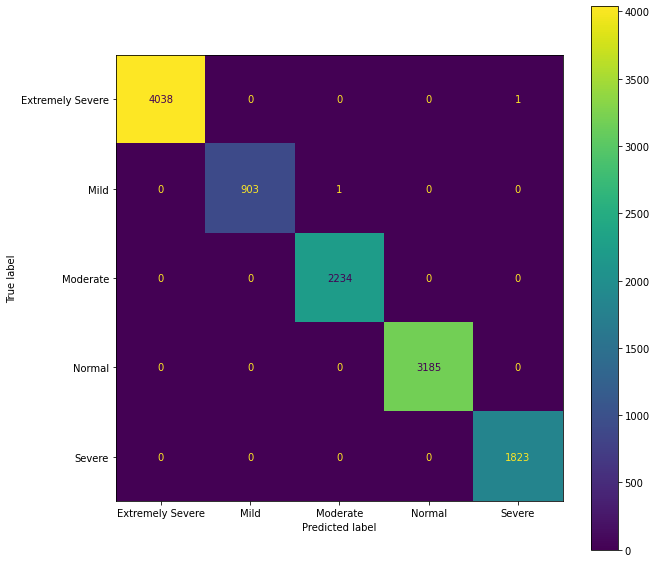

In [88]:
Lrg=LogisticRegression(solver='newton-cg').fit(X_train_scaled,y_train)
accu_lr=round(accuracy_score(y_test,Lrg.predict(X_test_scaled)),3)
f1_score_lr=round(f1_score(y_test,Lrg.predict(X_test_scaled),average='weighted'),3)
Precision_lr=round(precision_score(y_test,Lrg.predict(X_test_scaled),average='weighted'),3)
Recall_lr=round(recall_score(y_test,Lrg.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',accu_lr)
print('F1_Score:',f1_score_lr)
print('Recall_Score:',Precision_lr)
print('Precision_Score:',Recall_lr)
print('Cross Validation Score:',(np.mean(cross_val_score(Lrg, X_train_scaled, y_train, cv = 6))))
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(Lrg,X_test_scaled,y_test,ax=ax)
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Lrg.predict(X_test_scaled))
print(classification)

**Gaussian Naive Bayes**

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.811
F1_Score: 0.819
Recall_Score: 0.838
Precision_Score: 0.811


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

Cross Validation Score: 0.8112958618258315
                  precision    recall  f1-score   support

Extremely Severe     0.9904    0.8423    0.9104      4039
            Mild     0.4712    0.4978    0.4841       904
        Moderate     0.7157    0.8044    0.7574      2234
          Normal     0.9629    0.8562    0.9064      3185
          Severe     0.6142    0.8261    0.7046      1823

        accuracy                         0.8110     12185
       macro avg     0.7509    0.7654    0.7526     12185
    weighted avg     0.8380    0.8110    0.8189     12185



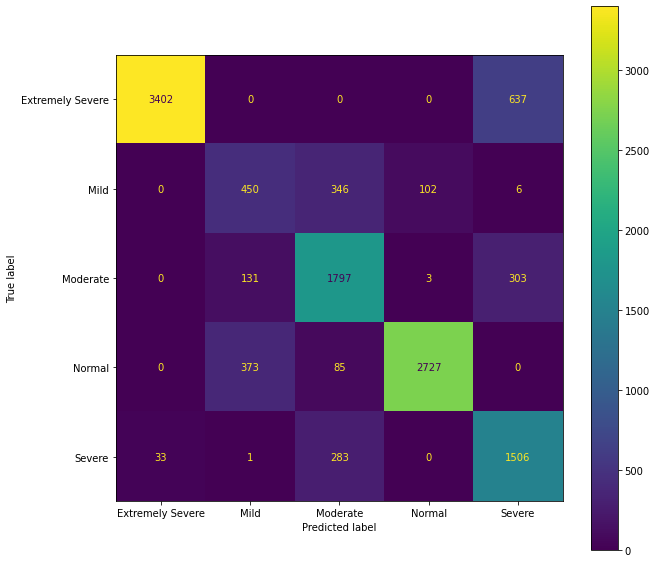

In [89]:
GB=GaussianNB().fit(X_train_scaled,y_train)
accu_gb=round(accuracy_score(y_test,GB.predict(X_test_scaled)),3)
f1_score_gb=round(f1_score(y_test,GB.predict(X_test_scaled),average='weighted'),3)
Precision_gb=round(precision_score(y_test,GB.predict(X_test_scaled),average='weighted'),3)
Recall_gb=round(recall_score(y_test,GB.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',accu_gb)
print('F1_Score:',f1_score_gb)
print('Recall_Score:',Precision_gb)
print('Precision_Score:',Recall_gb)
print('Cross Validation Score:',(np.mean(cross_val_score(GB, X_train_scaled, y_train, cv = 6))))
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(GB,X_test_scaled,y_test,ax=ax)
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=GB.predict(X_test_scaled))
print(classification)

**Nearest Neighbors**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


Accuracy: 0.792
F1_Score: 0.763
Recall_Score: 0.765
Precision_Score: 0.792


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when

Cross Validation Score: 0.7927786907750437
                  precision    recall  f1-score   support

Extremely Severe     0.9498    0.9500    0.9499      4039
            Mild     0.2794    0.0420    0.0731       904
        Moderate     0.6630    0.7610    0.7086      2234
          Normal     0.7477    0.9965    0.8544      3185
          Severe     0.7500    0.4937    0.5954      1823

        accuracy                         0.7919     12185
       macro avg     0.6780    0.6486    0.6363     12185
    weighted avg     0.7648    0.7919    0.7626     12185



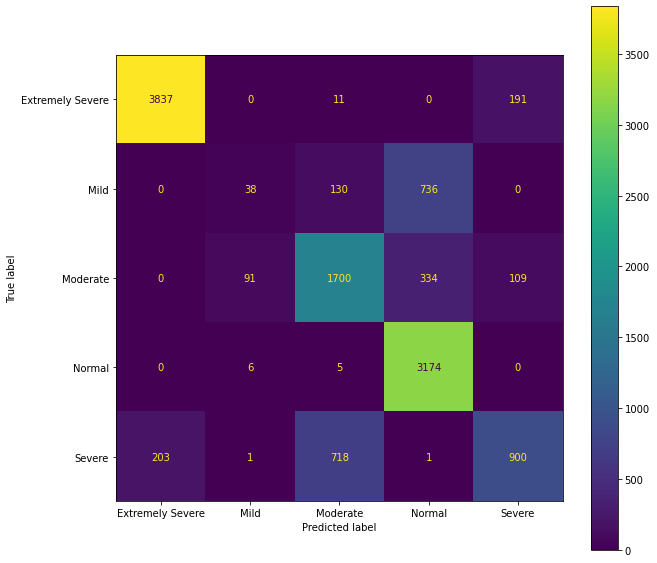

In [90]:
Knnr=KNeighborsClassifier(n_neighbors=19,weights='distance').fit(X_train_scaled,y_train)
accu_knn=round(accuracy_score(y_test,Knnr.predict(X_test_scaled)),3)
f1_score_knn=round(f1_score(y_test,Knnr.predict(X_test_scaled),average='weighted'),3)
Precision_knn=round(precision_score(y_test,Knnr.predict(X_test_scaled),average='weighted'),3)
Recall_knn=round(recall_score(y_test,Knnr.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',accu_knn)
print('F1_Score:',f1_score_knn)
print('Recall_Score:',Precision_knn)
print('Precision_Score:',Recall_knn)
print('Cross Validation Score:',(np.mean(cross_val_score(Knnr, X_train_scaled, y_train, cv = 6))))
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(Knnr,X_test_scaled,y_test,ax=ax)
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Knnr.predict(X_test_scaled))
print(classification)

**Support Vector Machines**

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.983
F1_Score: 0.983
Recall_Score: 0.983
Precision_Score: 0.983


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

Cross Validation Score: 0.9799363812444115
                  precision    recall  f1-score   support

Extremely Severe     0.9963    0.9913    0.9938      4039
            Mild     0.9591    0.9336    0.9462       904
        Moderate     0.9740    0.9740    0.9740      2234
          Normal     0.9928    0.9943    0.9936      3185
          Severe     0.9597    0.9803    0.9699      1823

        accuracy                         0.9830     12185
       macro avg     0.9764    0.9747    0.9755     12185
    weighted avg     0.9831    0.9830    0.9830     12185



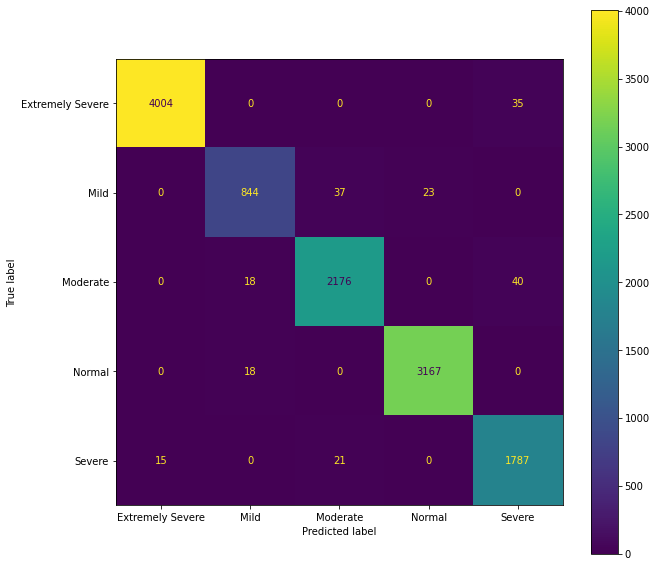

In [91]:
Svmc=SVC().fit(X_train_scaled,y_train)
accu_svm=round(accuracy_score(y_test,Svmc.predict(X_test_scaled)),3)
f1_score_svm=round(f1_score(y_test,Svmc.predict(X_test_scaled),average='weighted'),3)
Precision_svm=round(precision_score(y_test,Svmc.predict(X_test_scaled),average='weighted'),3)
Recall_svm=round(recall_score(y_test,Svmc.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',accu_svm)
print('F1_Score:',f1_score_svm)
print('Recall_Score:',Precision_svm)
print('Precision_Score:',Recall_svm)
print('Cross Validation Score:',(np.mean(cross_val_score(Svmc, X_train_scaled, y_train, cv = 6))))
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(Svmc,X_test_scaled,y_test,ax=ax)
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Svmc.predict(X_test_scaled))
print(classification)

In [118]:
Result_2={
                  'Model':['Random-Forest','Decision-Tree','Logistic-Regression','GaussianNB','Nearest-Neighbors','SVM'],
                  'Accuracy(%)':[accu_ran*100,accu_dt*100,accu_lr*100,accu_gb*100,accu_knn*100,accu_svm*100],
                  'F1_Score(%)':[f1_score_ran*100,f1_score_dt*100,f1_score_lr*100,f1_score_gb*100,f1_score_knn*100,f1_score_svm*100],
                  'Precision(%)':[Precision_ran*100,Precision_dt*100,Precision_lr*100,Precision_gb*100,Precision_knn*100,Precision_svm*100],
                  'Recall(%)':[Recall_ran*100,Recall_dt*100,Recall_lr*100,Recall_gb*100,Recall_knn*100,Recall_svm*100]
        
                    }
Result_Anxiety=pd.DataFrame(Result_2)

                                                                                            
                                                                                                                

# Results Achieved from above Modellings

In [121]:
Result_Depression

,Model,Accuracy(%),F1_Score(%),Precision(%),Recall(%)
0,Random-Forest,92.6,92.4,92.6,92.6
1,Decision-Tree,79.5,79.5,79.6,79.5
2,Logistic-Regression,100.0,100.0,100.0,100.0
3,GaussianNB,87.2,87.7,89.4,87.2
4,Nearest-Neighbors,87.0,86.3,87.1,87.0
5,SVM,98.7,98.7,98.7,98.7


In [122]:
Result_Stress

,Model,Accuracy(%),F1_Score(%),Precision(%),Recall(%)
0,Random-Forest,88.5,88.2,88.4,88.5
1,Decision-Tree,74.7,74.8,75.0,74.7
2,Logistic-Regression,100.0,100.0,100.0,100.0
3,GaussianNB,84.8,85.3,86.7,84.8
4,Nearest-Neighbors,84.1,83.9,83.8,84.1
5,SVM,98.4,98.4,98.4,98.4


In [123]:
Result_Anxiety

,Model,Accuracy(%),F1_Score(%),Precision(%),Recall(%)
0,Random-Forest,84.7,82.4,84.0,84.7
1,Decision-Tree,73.5,73.4,73.2,73.5
2,Logistic-Regression,100.0,100.0,100.0,100.0
3,GaussianNB,81.1,81.9,83.8,81.1
4,Nearest-Neighbors,79.2,76.3,76.5,79.2
5,SVM,98.3,98.3,98.3,98.3


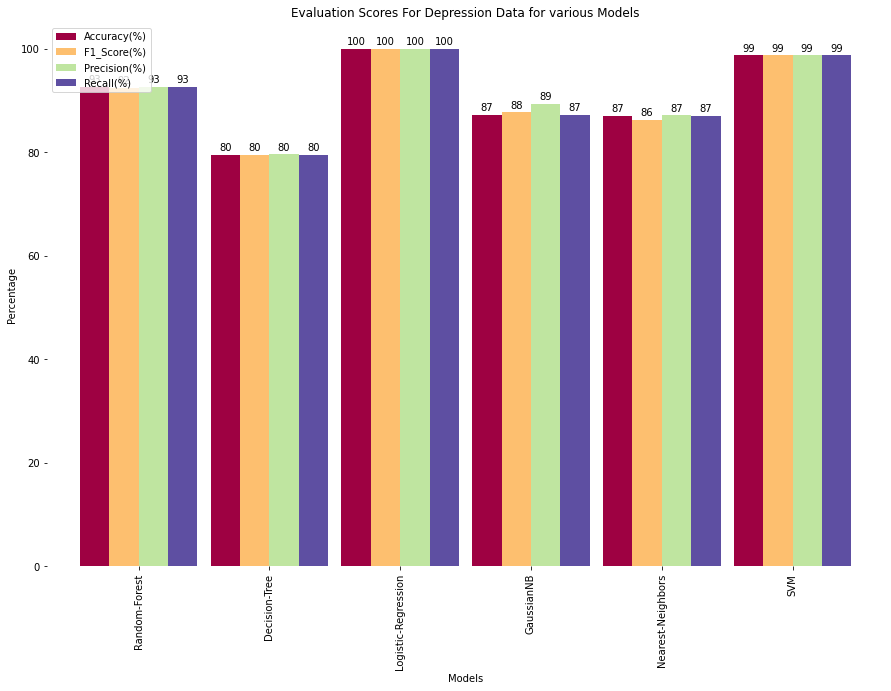

In [105]:
splot=Result_Depression.plot(x='Model',y=['Accuracy(%)','F1_Score(%)','Precision(%)','Recall(%)'],kind='bar',figsize=(15,10),cmap='Spectral',width=0.9)
for p in splot.patches:
    splot.annotate(format(round(p.get_height()), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0,7),
                   textcoords='offset points')
plt.title('Evaluation Scores For Depression Data for various Models')
plt.ylabel('Percentage')
plt.xlabel('Models')
plt.legend(loc='upper left')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

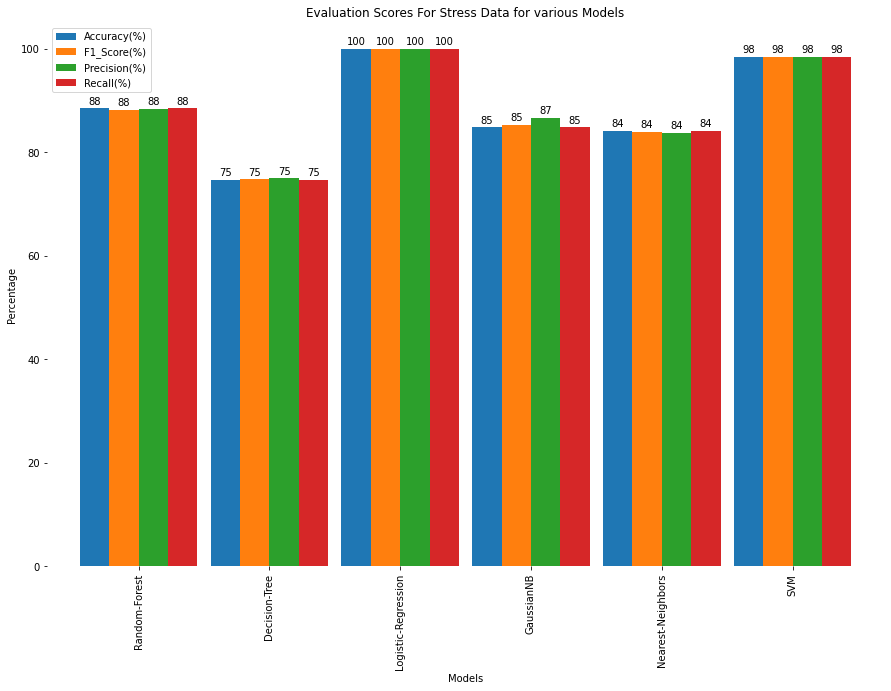

In [97]:
slot=Result_Stress.plot(x='Model',y=['Accuracy(%)','F1_Score(%)','Precision(%)','Recall(%)'],kind='bar',figsize=(15,10),width=0.9)
for p in slot.patches:
    slot.annotate(format(round(p.get_height()), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 7),
                   textcoords='offset points')
plt.title('Evaluation Scores For Stress Data for various Models')
plt.ylabel('Percentage')
plt.xlabel('Models')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

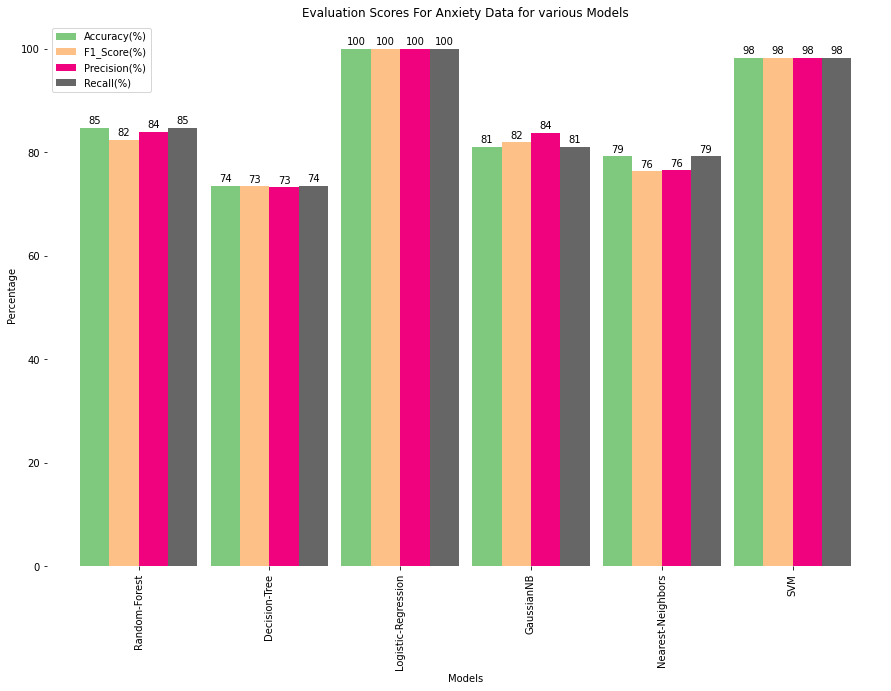

In [98]:
slot=Result_Anxiety.plot(x='Model',y=['Accuracy(%)','F1_Score(%)','Precision(%)','Recall(%)'],kind='bar',figsize=(15,10),cmap='Accent',width=0.9)
for p in slot.patches:
    slot.annotate(format(round(p.get_height()), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 7),
                   textcoords='offset points')
plt.title('Evaluation Scores For Anxiety Data for various Models')
plt.ylabel('Percentage')
plt.xlabel('Models')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

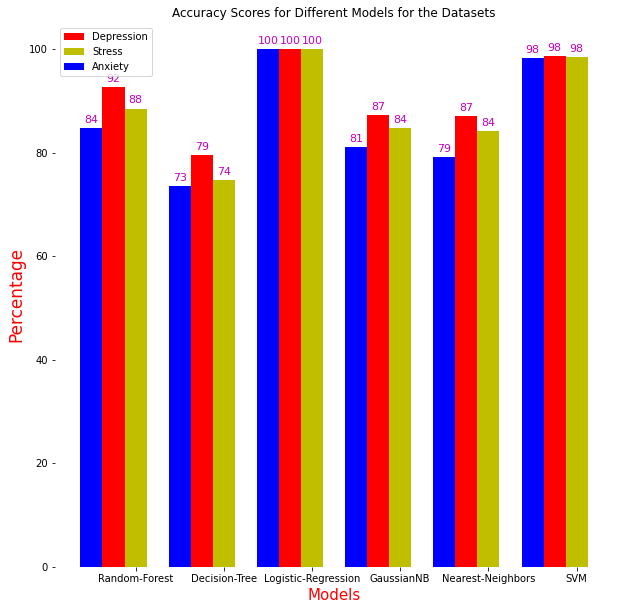

In [113]:
x=['Random-Forest','Decision-Tree','Logistic-Regression','GaussianNB','Nearest-Neighbors','SVM']
widt=0.25
X=np.arange(len(x))
plt.figure(figsize=(10,10))
bar1=plt.bar(X,Result_Depression['Accuracy(%)'],widt,color='r')
bar2=plt.bar(X+widt,Result_Stress['Accuracy(%)'],widt,color='y')
bar3=plt.bar(X-widt,Result_Anxiety['Accuracy(%)'],widt,color='b')
for bar in bar1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='m', fontsize=11)
for bar in bar2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='m', fontsize=11)
for bar in bar3:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='m', fontsize=11)
plt.xticks(X+widt,x)
plt.legend( (bar1, bar2, bar3),('Depression', 'Stress', 'Anxiety'))
plt.title('Accuracy Scores for Different Models for the Datasets')
plt.ylabel('Percentage',fontsize=17,color='red')
plt.xlabel('Models',fontsize=15,color='red')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()


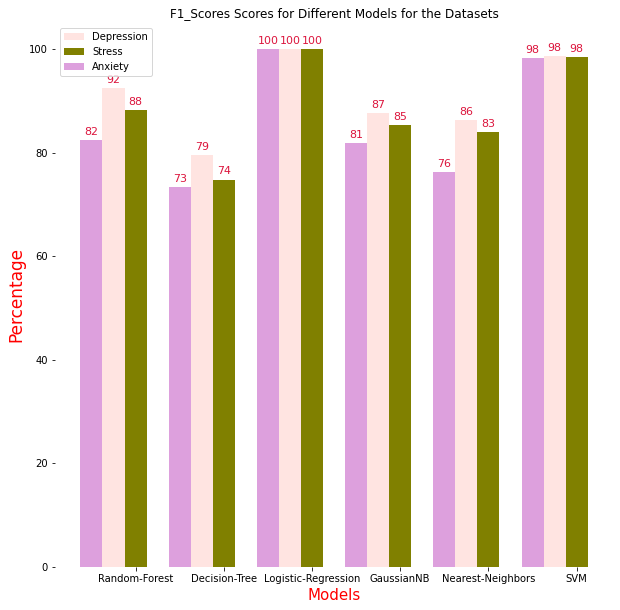

In [114]:
x=['Random-Forest','Decision-Tree','Logistic-Regression','GaussianNB','Nearest-Neighbors','SVM']
width=0.25
X=np.arange(len(x))
plt.figure(figsize=(10,10))
bar1=plt.bar(X,Result_Depression['F1_Score(%)'],width,color='mistyrose')
bar2=plt.bar(X+width,Result_Stress['F1_Score(%)'],width,color='olive')
bar3=plt.bar(X-width,Result_Anxiety['F1_Score(%)'],width,color='plum')
for bar in bar1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='crimson', fontsize=11)
for bar in bar2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='crimson', fontsize=11)
for bar in bar3:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='crimson', fontsize=11)
plt.xticks(X+width,x)
plt.legend( (bar1, bar2, bar3),('Depression', 'Stress', 'Anxiety'))
plt.title('F1_Scores Scores for Different Models for the Datasets')
plt.ylabel('Percentage',fontsize=17,color='red')
plt.xlabel('Models',fontsize=15,color='red')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()


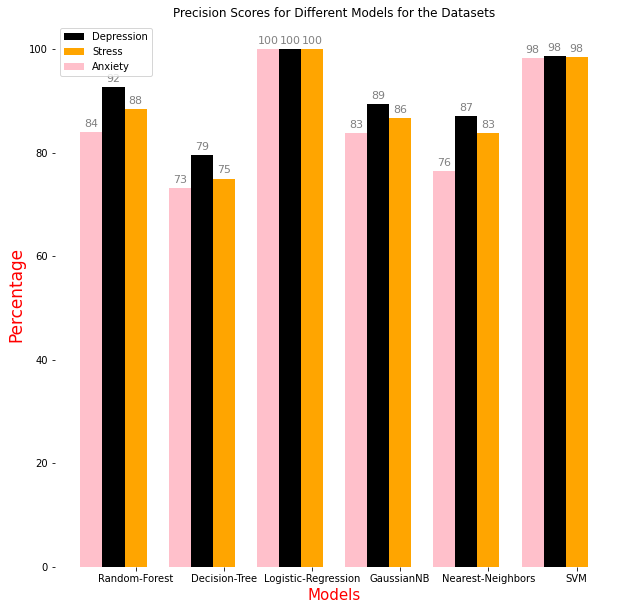

In [116]:
x=['Random-Forest','Decision-Tree','Logistic-Regression','GaussianNB','Nearest-Neighbors','SVM']
width=0.25
X=np.arange(len(x))
plt.figure(figsize=(10,10))
bar1=plt.bar(X,Result_Depression['Precision(%)'],width,color='black')
bar2=plt.bar(X+width,Result_Stress['Precision(%)'],width,color='orange')
bar3=plt.bar(X-width,Result_Anxiety['Precision(%)'],width,color='pink')
for bar in bar1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='gray', fontsize=11)
for bar in bar2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='gray', fontsize=11)
for bar in bar3:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='gray', fontsize=11)
plt.xticks(X+width,x)
plt.legend( (bar1, bar2, bar3),('Depression', 'Stress', 'Anxiety'))
plt.title('Precision Scores for Different Models for the Datasets')
plt.ylabel('Percentage',fontsize=17,color='red')
plt.xlabel('Models',fontsize=15,color='red')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()


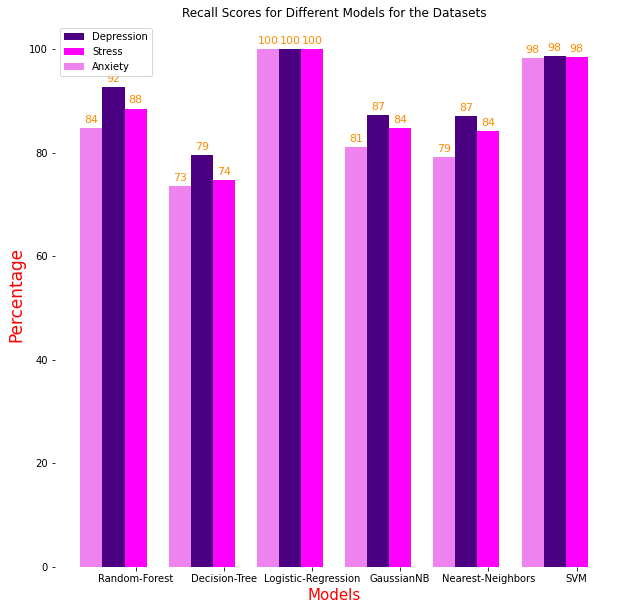

In [117]:
x=['Random-Forest','Decision-Tree','Logistic-Regression','GaussianNB','Nearest-Neighbors','SVM']
width=0.25
X=np.arange(len(x))
plt.figure(figsize=(10,10))
bar1=plt.bar(X,Result_Depression['Recall(%)'],width,color='indigo')
bar2=plt.bar(X+width,Result_Stress['Recall(%)'],width,color='magenta')
bar3=plt.bar(X-width,Result_Anxiety['Recall(%)'],width,color='violet')
for bar in bar1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='darkorange', fontsize=11)
for bar in bar2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='darkorange', fontsize=11)
for bar in bar3:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='darkorange', fontsize=11)
plt.xticks(X+width,x)
plt.legend( (bar1, bar2, bar3),('Depression', 'Stress', 'Anxiety'))
plt.title('Recall Scores for Different Models for the Datasets')
plt.ylabel('Percentage',fontsize=17,color='red')
plt.xlabel('Models',fontsize=15,color='red')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()
